In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt


path = 'testare1' # pathu catre folderul cu imaginile de test
aux_img_path = 'imagini_auxiliare/' # path catre folderul cu imaginile auxiliare
output_path = '342_Rapcea_Catalin/'

In [3]:
def show_image(title, image):
    image = cv.resize(image, (0, 0), fx=1, fy=1)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert color for Matplotlib
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
def save_image(filename, image):
    # Resize the image if needed
    image = cv.resize(image, (0, 0), fx=1, fy=1)
    # Save the image in the desired format
    cv.imwrite(filename, image)
    print(f"Image saved as {filename}")

In [5]:
# def show_image(title,image):
#     image=cv.resize(image,(0,0),fx=0.3,fy=0.3)
#     cv.imshow(title,image)
#     cv.waitKey(0)
#     cv.destroyAllWindows()

In [6]:
def get_careu(img):
    img_copy = img.copy()
    frame_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    # l = np.array([19, 158, 0])
    # u = np.array([74, 219, 255])
    # l = np.array([16, 0, 165])
    # u = np.array([50, 219, 255])
    # mask_table_hsv = cv.inRange(frame_hsv, l, u)
    # res = cv.bitwise_and(img, img, mask=mask_table_hsv)
    # show_image('res',res)
    # 
    # image = cv.cvtColor(res,cv.COLOR_BGR2GRAY)
    # image_m_blur = cv.medianBlur(image,3)
    # image_g_blur = cv.GaussianBlur(image_m_blur, (3, 3), 5)
    # image_sharpened = cv.addWeighted(image_m_blur, 1.2, image_g_blur, -0.8, 0)
    # show_image('image_sharpened',image_sharpened)
    # _, thresh = cv.threshold(image_sharpened, 100, 255, cv.THRESH_BINARY)
    # show_image('image_thresholded',thresh)
    # kernel = np.ones((3, 3), np.uint8)
    # 
    # edges = cv.Canny(thresh, 50, 150) 
    # show_image('edges',edges)
    l = np.array([16, 0, 165])
    u = np.array([50, 219, 255])
    mask_table_hsv = cv.inRange(frame_hsv, l, u)
    res = cv.bitwise_and(img, img, mask=mask_table_hsv)
    # show_image('res', res)
    # save_image('imagini/res.jpg', res)
    
    # Convert to grayscale
    image = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
    
    # Apply a Gaussian blur to smooth the image
    image_smoothed = cv.GaussianBlur(image, (15, 15), 5)  # Larger kernel for stronger blur
    # show_image('image_smoothed', image_smoothed)
    # save_image('imagini/image_smoothed.jpg', image_smoothed)
    
    # Threshold the smoothed image
    _, thresh = cv.threshold(image_smoothed, 130, 255, cv.THRESH_BINARY)
    # show_image('image_thresholded', thresh)
    # save_image('imagini/image_thresholded.jpg', thresh)
    
    # Edge detection
    edges = cv.Canny(thresh, 70, 170)
    # show_image('edges', edges)
    # save_image('imagini/edges.jpg', edges)

    contours, _ = cv.findContours(edges,  cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


    top_left = None
    top_right = None
    bottom_left = None
    bottom_right = None

    for contour in contours:
        if len(contour) > 15:
            for point in contour.squeeze():
                x, y = point
                if top_left is None or (x + y) < (top_left[0] + top_left[1]):
                    top_left = (x, y)
                if bottom_right is None or (x + y) > (bottom_right[0] + bottom_right[1]):
                    bottom_right = (x, y)
                if top_right is None or (x - y) < (top_right[0] - top_right[1]):
                    top_right = (x, y)
                if bottom_left is None or (x - y) > (bottom_left[0] - bottom_left[1]):
                    bottom_left = (x, y)

    corners = [top_left, top_right, bottom_right, bottom_left]

    # print(top_left, top_right, bottom_right, bottom_left)

    width = 1260
    height = 1260


    puzzle = np.array([top_left,top_right,bottom_right,bottom_left], dtype = "float32")
    destination_of_puzzle = np.array([[0,0],[0, height],[width,height],[width, 0]], dtype = "float32")

    M = cv.getPerspectiveTransform(puzzle,destination_of_puzzle)

    result = cv.warpPerspective(img_copy, M, (width, height))
    # result = cv.cvtColor(result,cv.COLOR_GRAY2BGR)
    # show_image('result', result)
    # save_image('imagini/result.jpg', result)
    
    frame_hsv = cv.cvtColor(result, cv.COLOR_BGR2HSV)
    l = np.array([0 , 0, 70])
    u = np.array([255, 255, 255])
    mask_table_hsv = cv.inRange(frame_hsv, l, u)
    # save_image('imagini/mask_table_hsv.jpg', mask_table_hsv)
    # res = cv.bitwise_and(result, result, mask=mask_table_hsv)
    return mask_table_hsv

In [7]:
lines_horizontal=[]
for i in range(0,1261,90):
    l=[]
    l.append((0,i))
    l.append((1259,i))
    lines_horizontal.append(l)

In [8]:
lines_vertical=[]
for i in range(0,1261,90):
    l=[]
    l.append((i,0))
    l.append((i,1259))
    lines_vertical.append(l)

In [9]:
def find_surrounded_negatives(matrix):
    rows, cols = matrix.shape
    elements_to_check = []

    directions = [(-1, 0),
                  (1, 0),
                  (0, -1),
                  (0, 1)]

    for row in range(rows):
        for col in range(cols):
            if matrix[row, col] == -1:
                for dr, dc in directions:
                    r, c = row + dr, col + dc
                    if 0 <= r < rows and 0 <= c < cols:
                        if matrix[r, c] != -1:
                            elements_to_check.append((row, col))
                            break

    return elements_to_check

In [10]:
def get_new_element(prev_board, next_board, matrix):
    elements_to_check = find_surrounded_negatives(matrix)
    # show_image('prev_board',prev_board)
    # show_image('next_board',next_board)

    elem_row, elem_col = 0, 0
    max_diff = 0
    for row, col in elements_to_check:
        y_min = lines_vertical[col][0][0]+20
        y_max = lines_vertical[col + 1][1][0]-20
        x_min = lines_horizontal[row][0][1]+20
        x_max = lines_horizontal[row + 1][1][1]-20
        prev_patch = prev_board[x_min:x_max, y_min:y_max].copy()
        next_patch = next_board[x_min:x_max, y_min:y_max].copy()
        avg_prev_patch=np.mean(prev_patch)
        avg_next_patch=np.mean(next_patch)
        if abs(avg_next_patch-avg_prev_patch)>max_diff:
            max_diff=abs(avg_next_patch-avg_prev_patch)
            elem_row, elem_col = row, col
    matrix[elem_row][elem_col] = 0
    y_min = lines_vertical[elem_col][0][0]
    y_max = lines_vertical[elem_col + 1][1][0] 
    x_min = lines_horizontal[elem_row][0][1]
    x_max = lines_horizontal[elem_row + 1][1][1]
    patch = next_board[x_min:x_max, y_min:y_max].copy()
    return patch, elem_row, elem_col




In [11]:
def get_numbers(img):
    img = get_careu(img)
    elements = []
    
    for row in range(5, 11):
        for col in range(4, 12):
            y_min = lines_vertical[col][0][0]+10
            y_max = lines_vertical[col + 1][1][0]
            x_min = lines_horizontal[row][0][1]+10
            x_max = lines_horizontal[row + 1][1][1]-5
            patch = img[x_min:x_max, y_min:y_max].copy()
            elements.append(patch)

    

    element_to_number = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 17, 18, 19, 20, 21, 24, 25, 27, 28, 30,32,35,36,40,42,45,48,49,50, 54, 56, 60,63, 64, 70, 72, 80, 81, 90]
    
    elements = elements[:len(element_to_number)]
    
    return elements, element_to_number

In [12]:
def clasifica_cifra(patch, templates):
    maxi=-np.inf
    poz=-1
    padded_patch = cv.copyMakeBorder(patch, 20, 20, 20, 20, cv.BORDER_CONSTANT, value=255)
    # show_image('padded_patch',padded_patch)
    for j in range(len(templates)):
        corr = cv.matchTemplate(padded_patch,templates[j],  cv.TM_CCORR_NORMED)
        corr=np.max(corr)
        if corr>maxi:
            maxi=corr
            poz=j
    return poz

In [13]:
def check_number(matrix, row, col, number):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    for dr, dc in directions:
        r1, c1 = row + dr, col + dc
        r2, c2 = row + 2 * dr, col + 2 * dc
        if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
            if (matrix[r1][c1] + matrix[r2][c2] == number or
                matrix[r1][c1] - matrix[r2][c2] == number or matrix[r2][c2] - matrix[r1][c1] == number or
                matrix[r1][c1] * matrix[r2][c2] == number or
                (matrix[r2][c2] != 0 and matrix[r1][c1] / matrix[r2][c2] == number)
                or (matrix[r1][c1] != 0 and matrix[r2][c2] / matrix[r1][c1] == number)):
                return True
    
    return False


In [14]:
def read_moves(filename):
    moves = []
    first_player = None
    # print(filename)

    with open(filename, "r") as file: 
        for line_num, line in enumerate(file):
            player, move = line.split()
            moves.append(int(move))

            if line_num == 0:
                if player == "Player1":
                    first_player = True
                else:
                    first_player = False
                
    return moves[1:], first_player

In [15]:
def calculate_score(matrix, row, col):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    k = 0
    number = matrix[row][col]
    
    if (row, col) in [(7,3), (6,4), (3,6), (4,7), (9,6), (10,7), (7, 9), (6, 10)]:
        for dr, dc in directions:
            r1, c1 = row + dr, col + dc
            r2, c2 = row + 2 * dr, col + 2 * dc
            if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
                if (matrix[r1][c1] + matrix[r2][c2] == number):
                    k+=1
        return k*number
    elif (row, col) in [(6,3), (7,4), (4,6), (3,7), (10,6), (9,7), (6, 9), (7, 10)]:
        for dr, dc in directions:
            r1, c1 = row + dr, col + dc
            r2, c2 = row + 2 * dr, col + 2 * dc
            if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
                if (matrix[r1][c1] * matrix[r2][c2] == number):
                    k+=1
        return k*number
    elif (row, col) in [(2,5), (2,8), (5,2), (5,11), (8,2), (8,11), (11,5), (11,8),]:
        for dr, dc in directions:
            r1, c1 = row + dr, col + dc
            r2, c2 = row + 2 * dr, col + 2 * dc
            if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
                if (matrix[r1][c1] - matrix[r2][c2] == number) or (matrix[r2][c2] - matrix[r1][c1] == number):
                    k+=1
        return k*number
    elif (row, col) in [(1,4), (1,9), (4,1), (4,12), (9,1), (9,12), (12,4), (12,9)]:
        for dr, dc in directions:
            r1, c1 = row + dr, col + dc
            r2, c2 = row + 2 * dr, col + 2 * dc
            if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
                if (matrix[r2][c2] != 0 and matrix[r1][c1] / matrix[r2][c2] == number) or (matrix[r1][c1] != 0 and matrix[r2][c2] / matrix[r1][c1] == number):
                    k+=1
        return k*number
    for dr, dc in directions:
        r1, c1 = row + dr, col + dc
        r2, c2 = row + 2 * dr, col + 2 * dc
        if 0 <= r1 < len(matrix) and 0 <= c1 < len(matrix[0]) and 0 <= r2 < len(matrix) and 0 <= c2 < len(matrix[0]) and matrix[r1][c1]!=-1 and matrix[r2][c2]!=-1:
            if (matrix[r1][c1] + matrix[r2][c2] == number or
                matrix[r1][c1] - matrix[r2][c2] == number or matrix[r2][c2] - matrix[r1][c1] == number or
                matrix[r1][c1] * matrix[r2][c2] == number or
                (matrix[r2][c2] != 0 and matrix[r1][c1] / matrix[r2][c2] == number)
                or (matrix[r1][c1] != 0 and matrix[r2][c2] / matrix[r1][c1] == number)):
                k+=1
    if (row, col) in [(1,1), (2,2), (3,3), (4,4), (9,9), (10,10), (11,11), (1, 12), (2, 11), (3, 10), (4, 9), (9, 4), (10, 3), (11, 2), (12, 1)]:
        k*=2
    if (row, col) in [(0,0), (0,6), (0,7), (0.13), (6,0), (6,13), (7,0), (7,13), (13,0), (13,6), (13,7), (13,13)]:
        k*=3
    return k*number
    

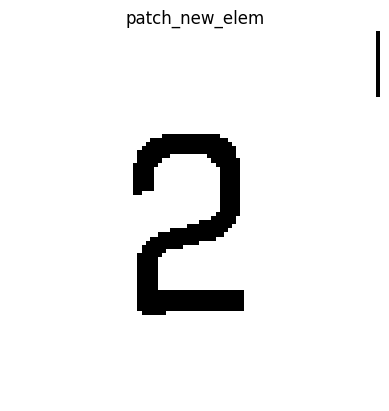

9G 2


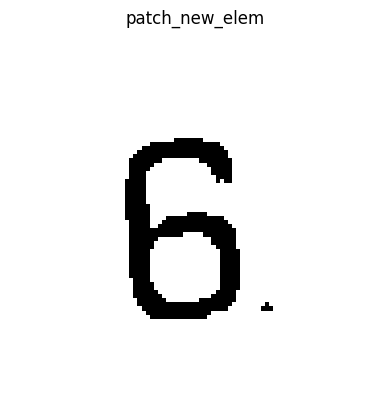

9H 6


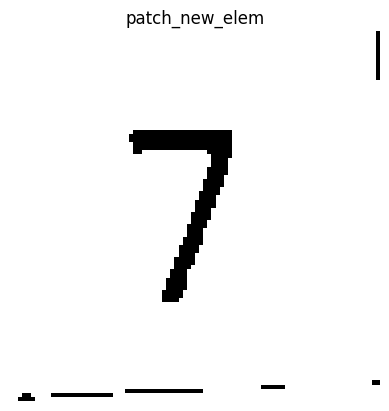

8I 7


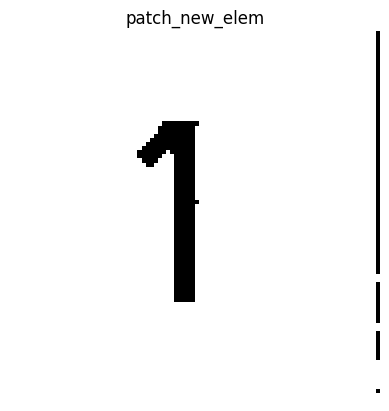

7I 1


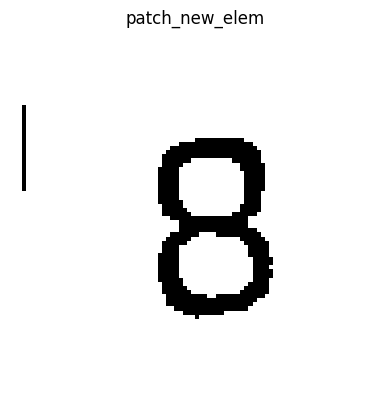

9I 8


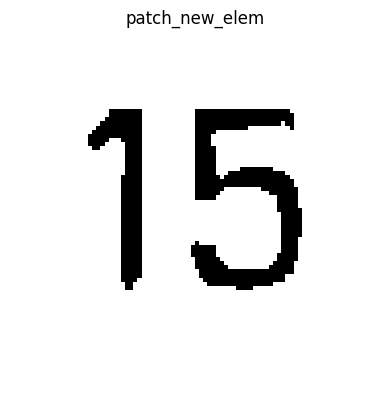

10I 15


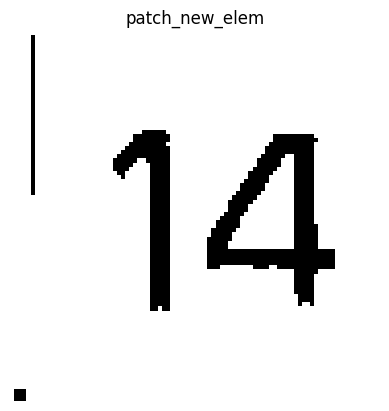

9J 14


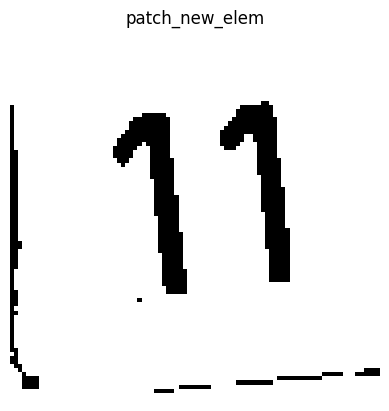

8J 11


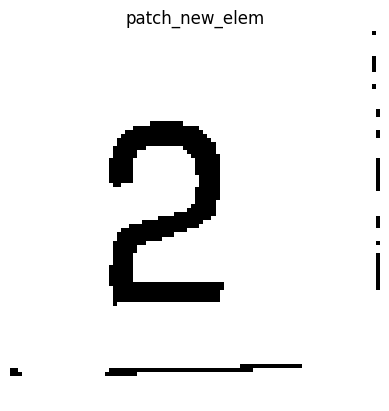

7J 2


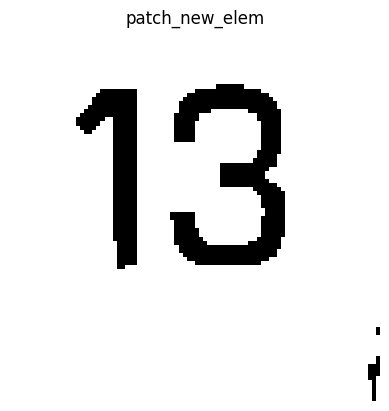

6J 13


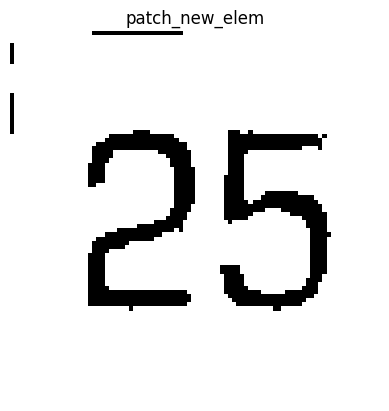

10J 25


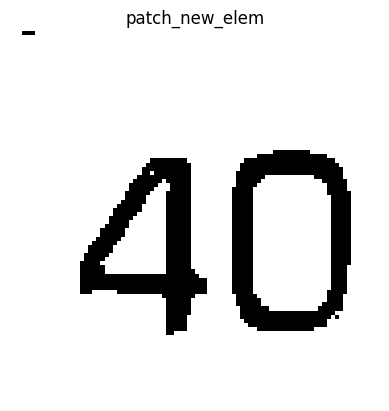

10K 40


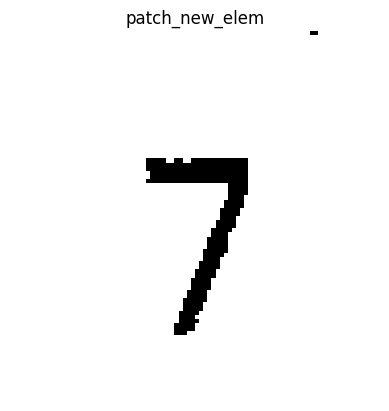

11I 7


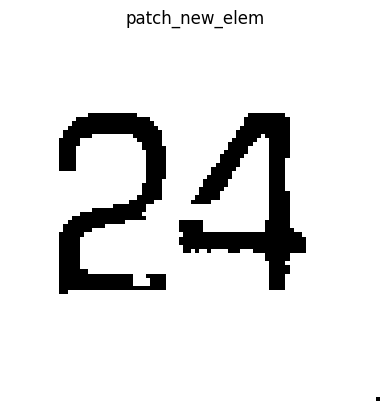

10H 24


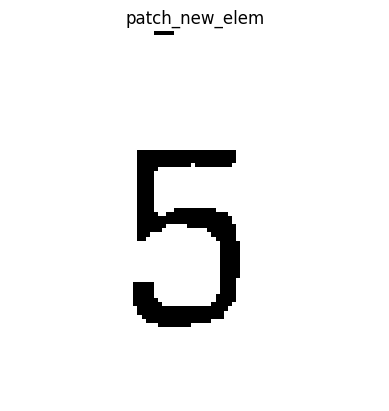

10G 5


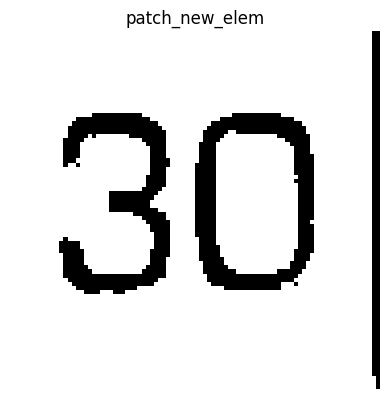

11H 30


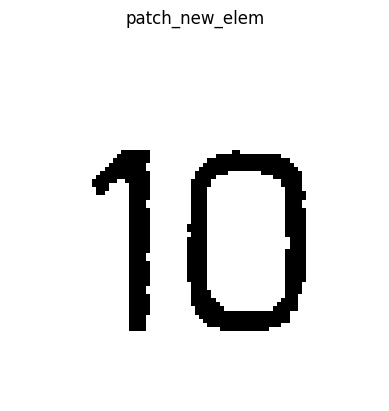

11G 10


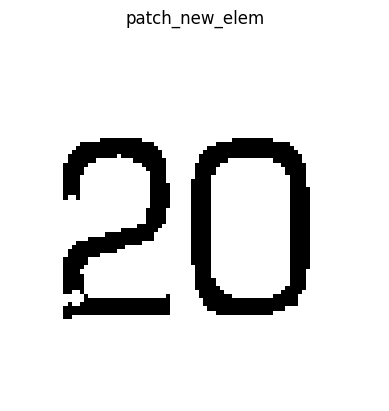

11F 20


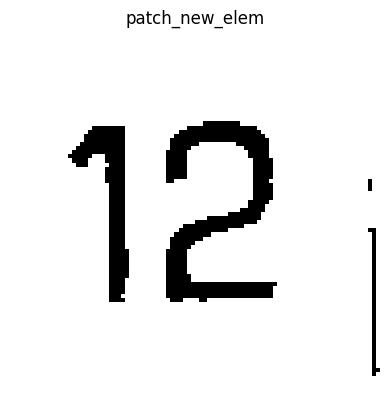

9F 12


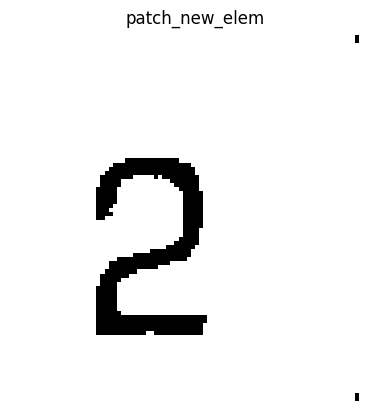

11E 2


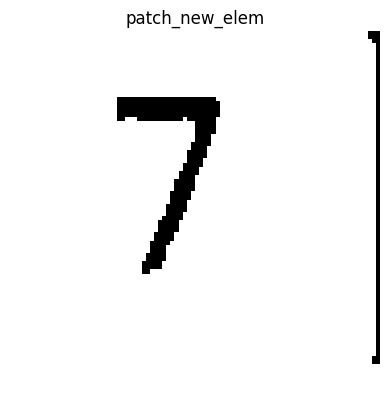

8F 7


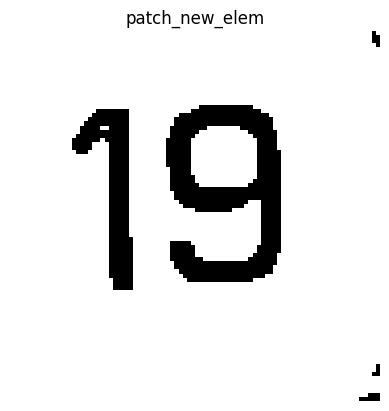

7F 19


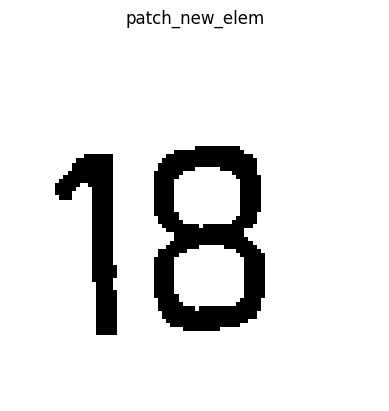

11D 18


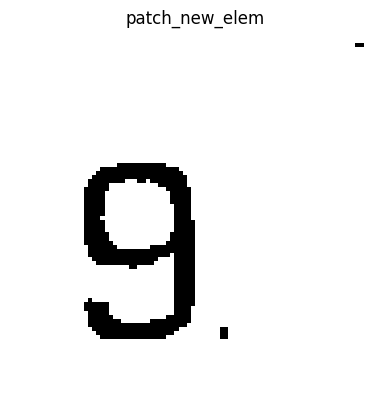

11C 9


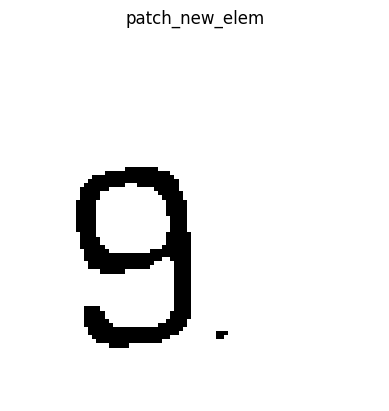

11B 9


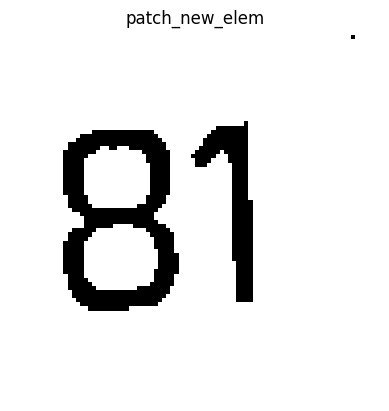

11A 81


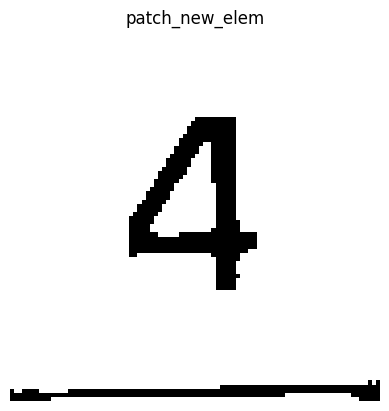

6G 4


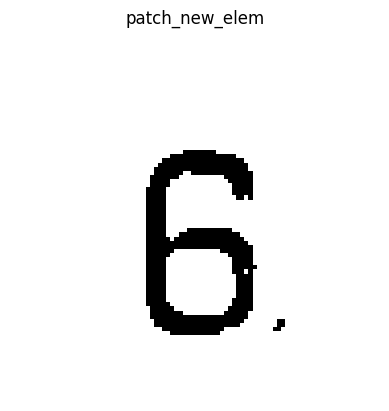

12H 6


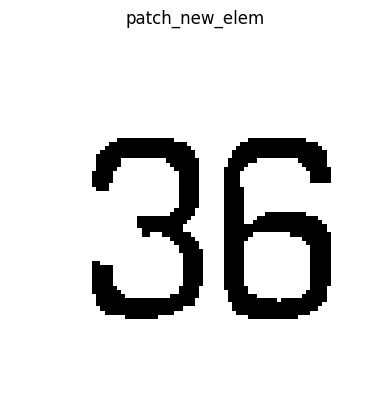

13H 36


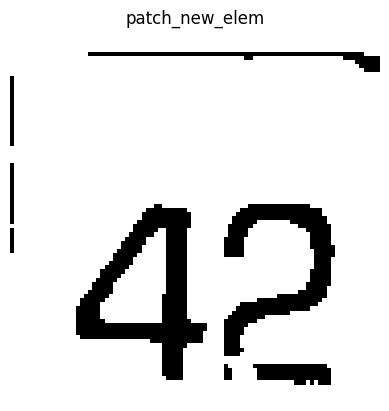

14H 42


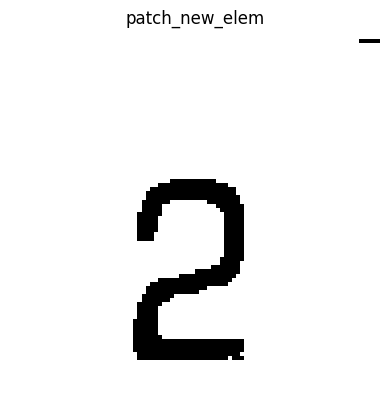

12G 2


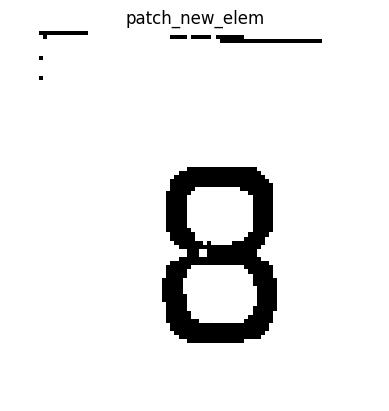

12I 8


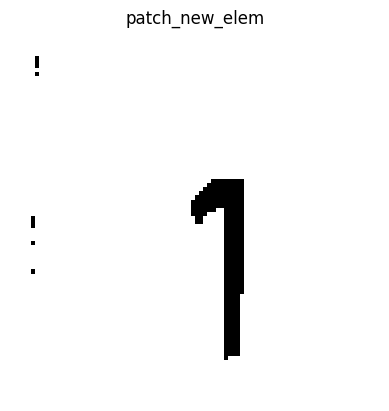

13I 1


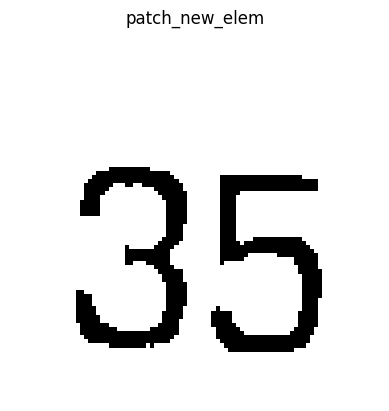

13G 35


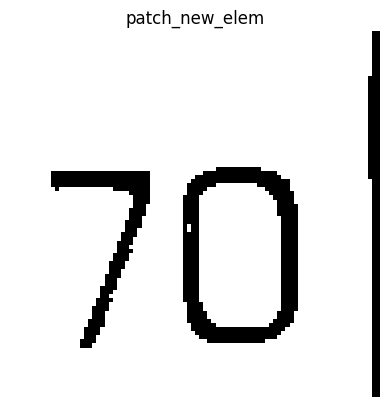

14G 70


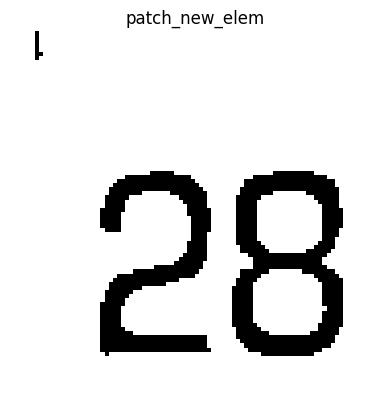

14I 28


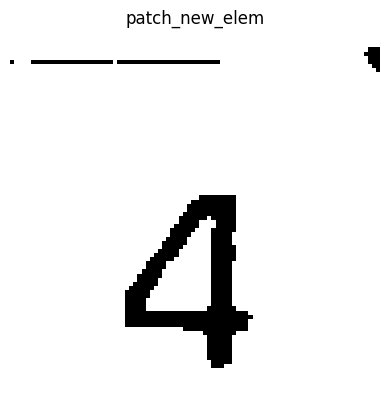

12F 4


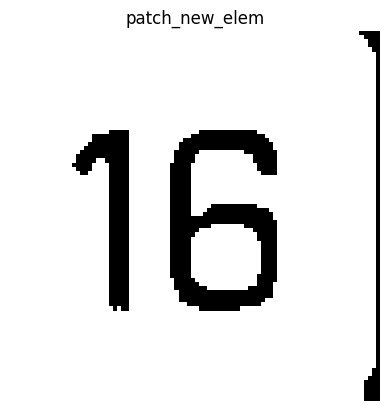

10F 16


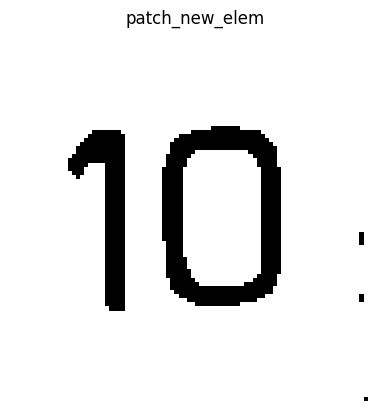

9E 10


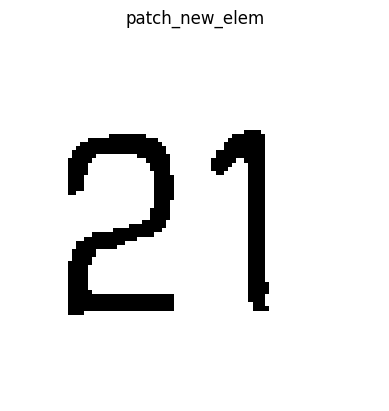

10E 21


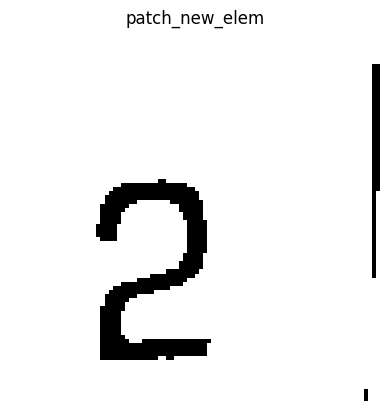

12E 2


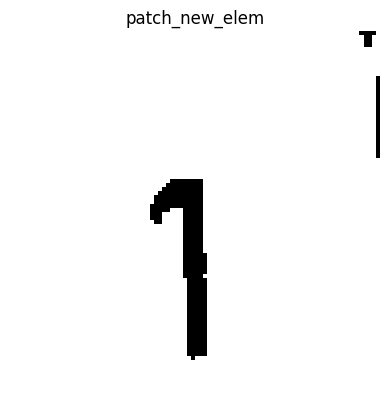

13E 1


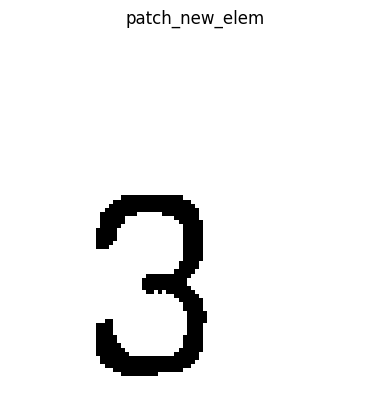

14E 3


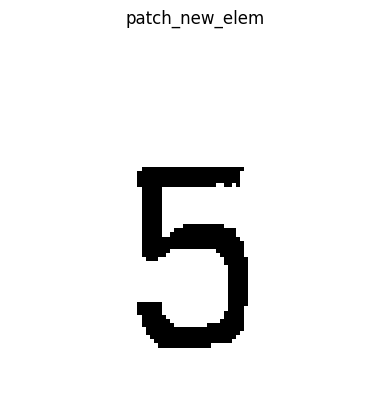

13F 5


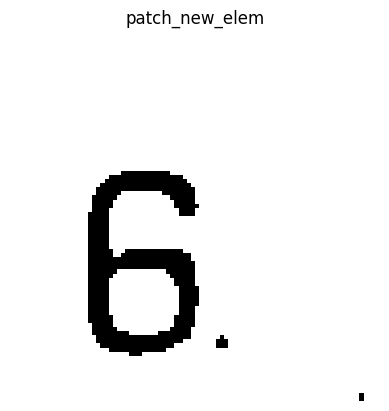

13D 6


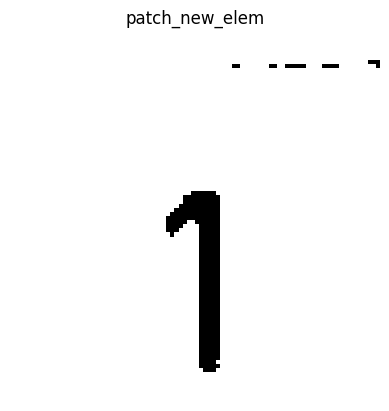

14F 1


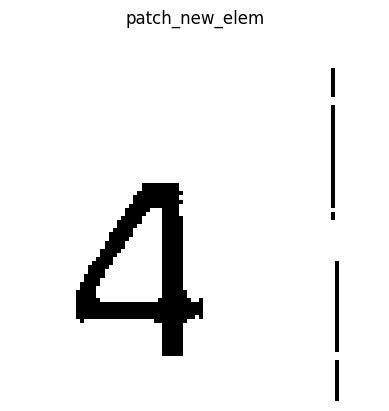

14D 4


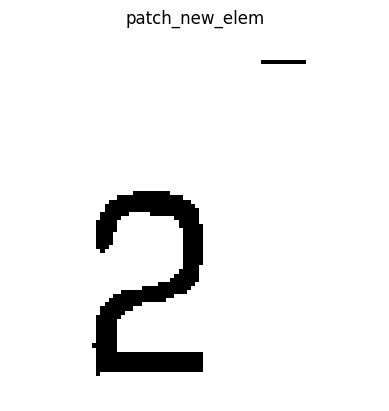

12D 2


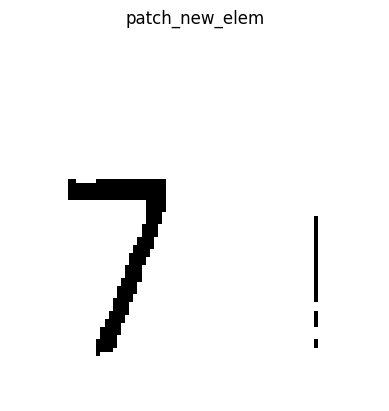

14C 7


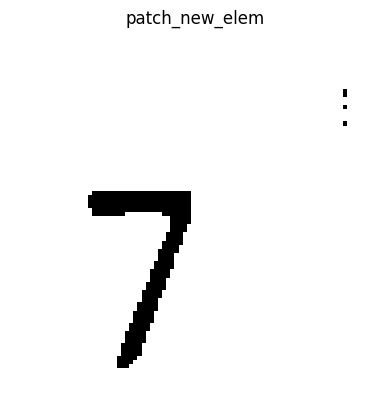

13C 7


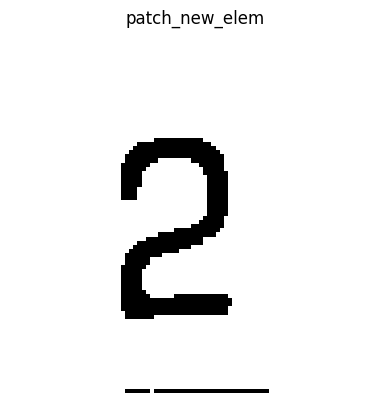

7F 2


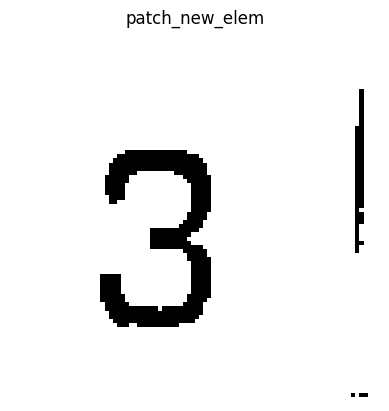

7E 3


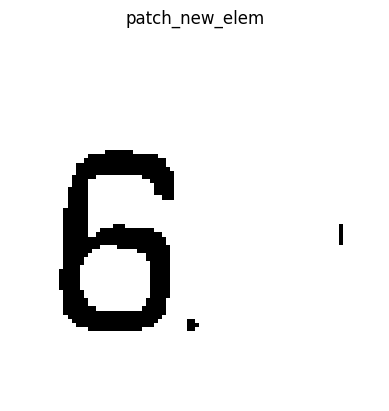

7D 6


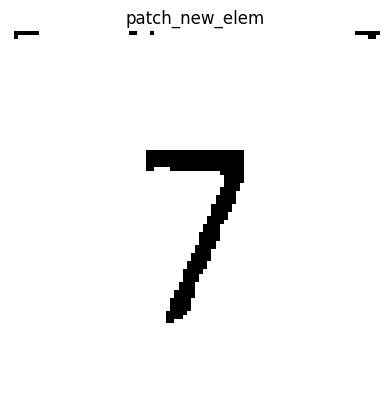

8F 7


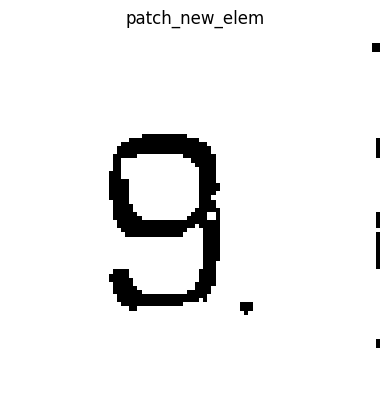

9F 9


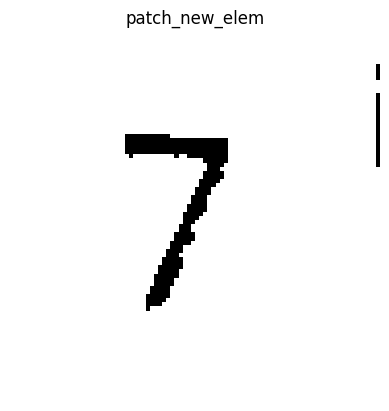

8I 7


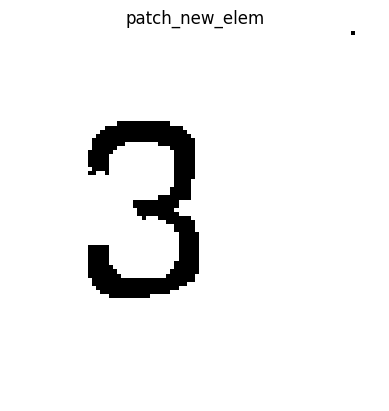

7I 3


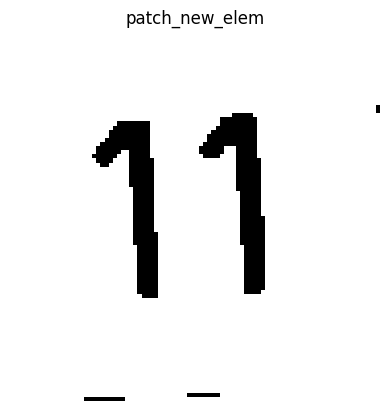

8J 11


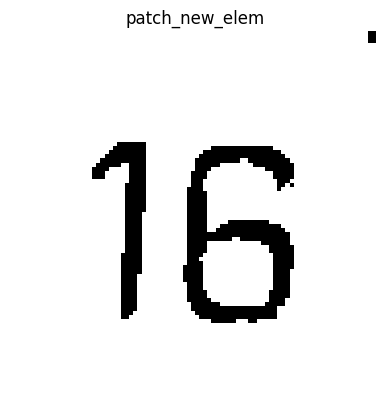

10F 16


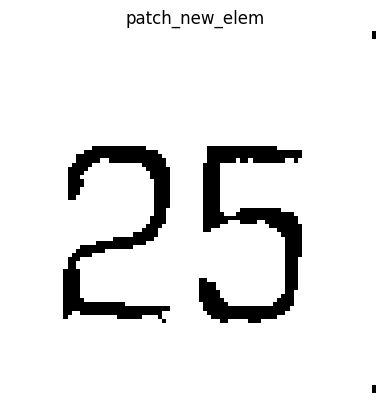

25
11F 25


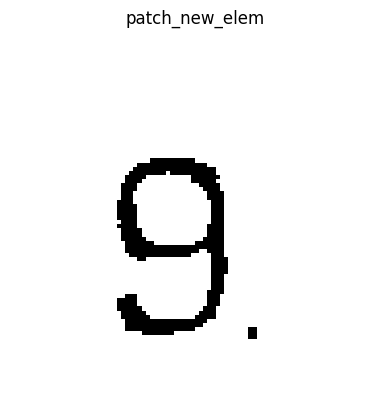

12F 9


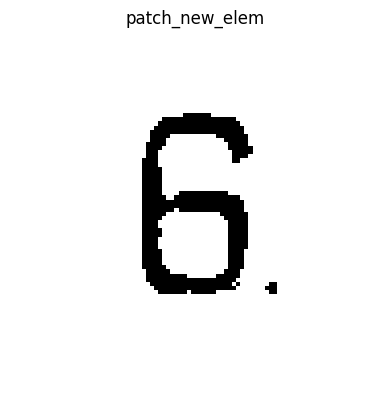

9H 6


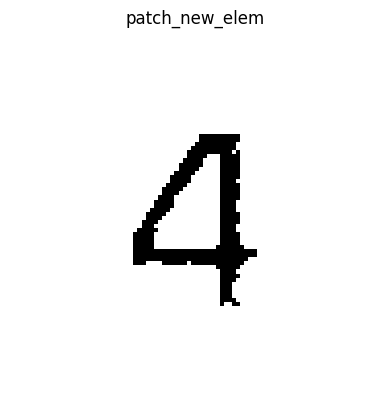

9G 4


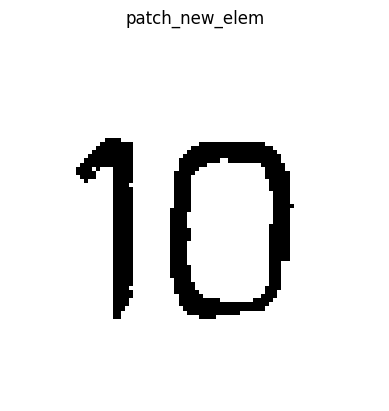

9I 10


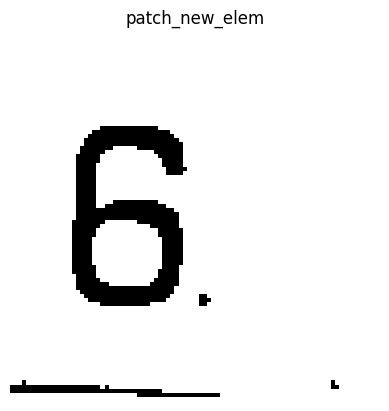

7J 6


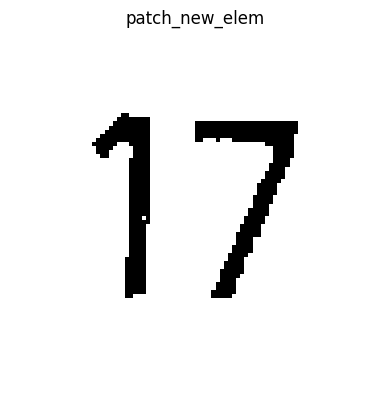

9J 17


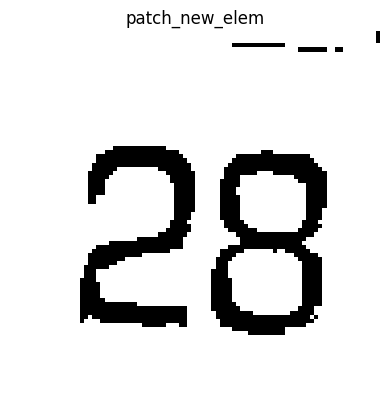

10J 28


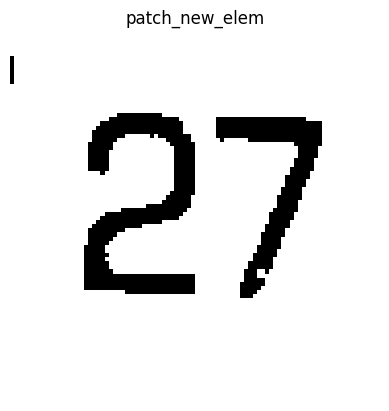

9K 27


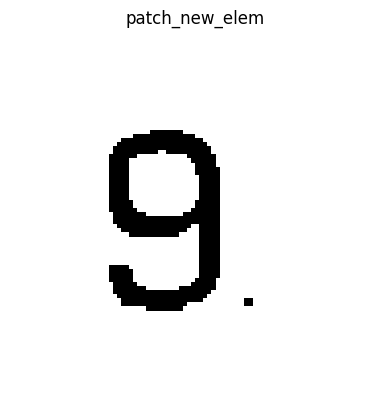

7K 9


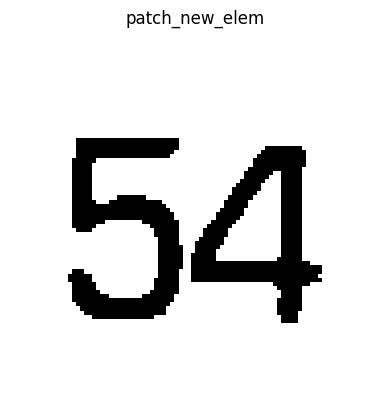

7L 54


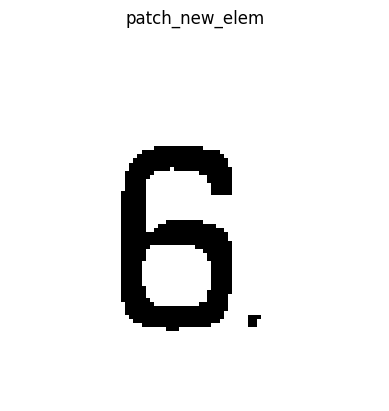

7M 6


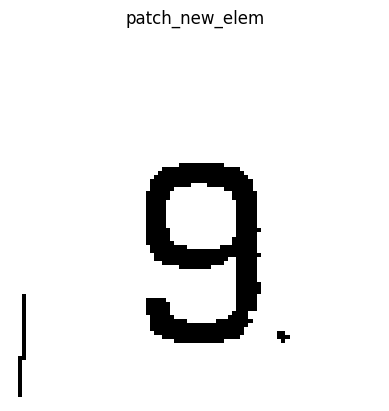

7N 9


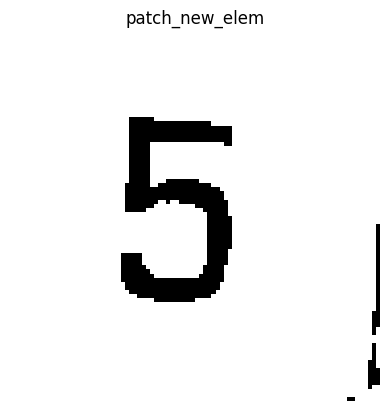

6J 5


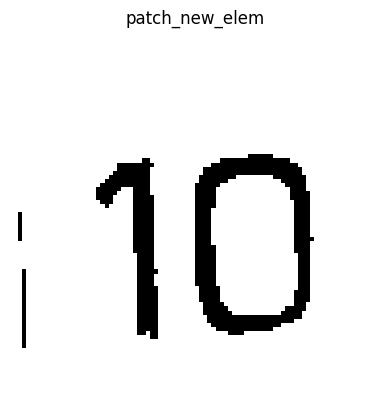

9L 10


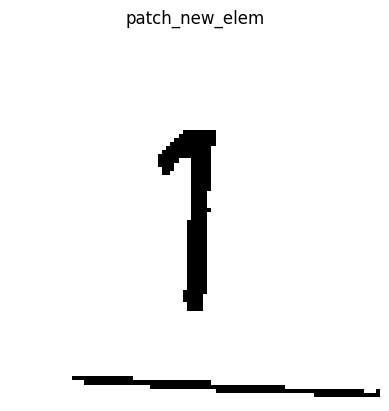

5J 1


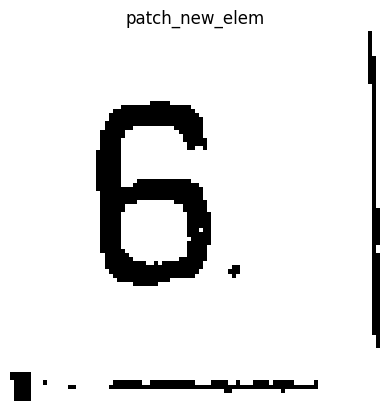

6H 6


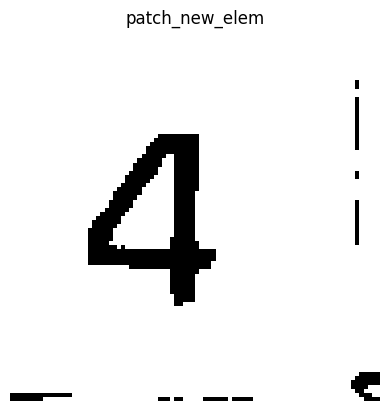

6G 4


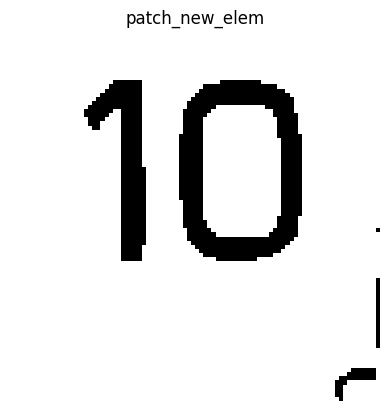

6I 10


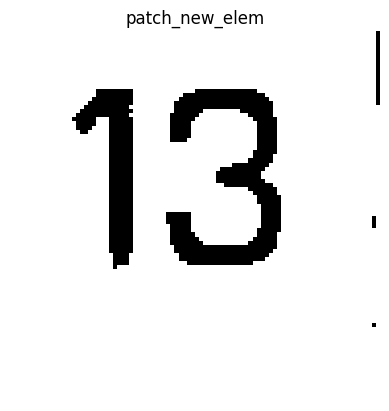

5I 13


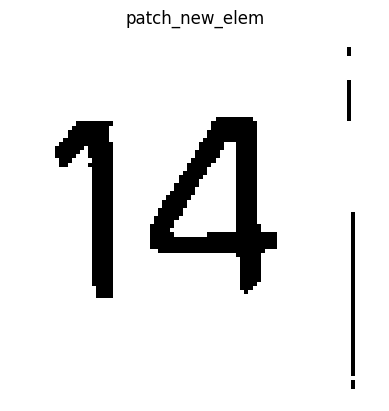

6F 14


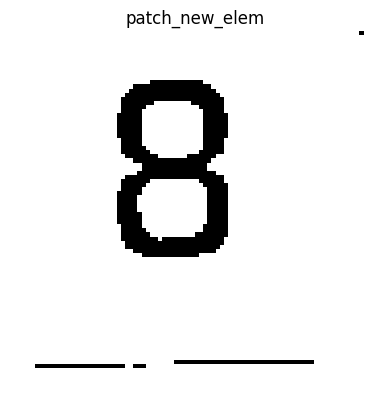

5H 8


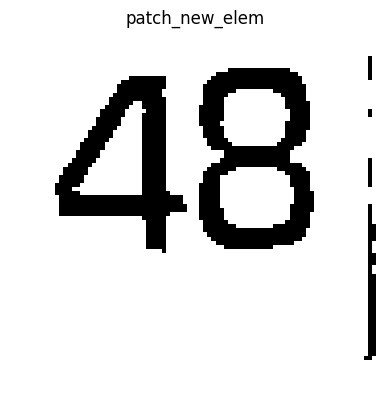

4H 48


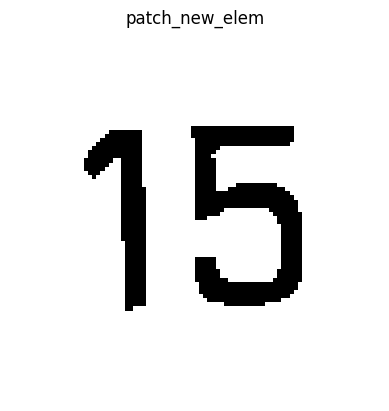

6K 15


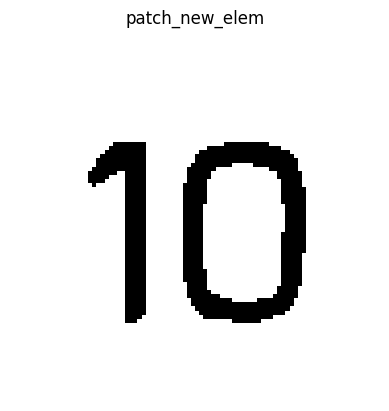

6L 10


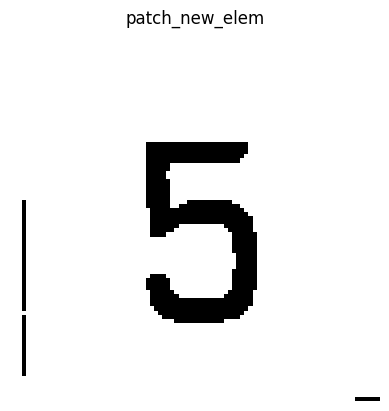

6M 5


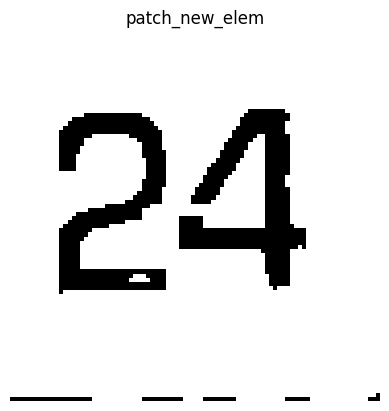

5K 24


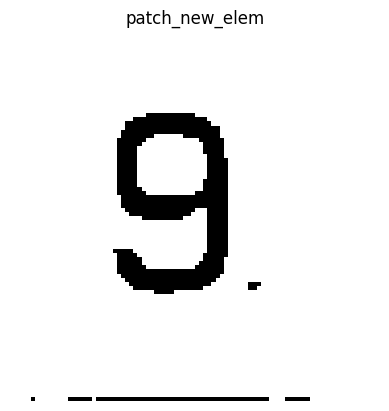

4K 9


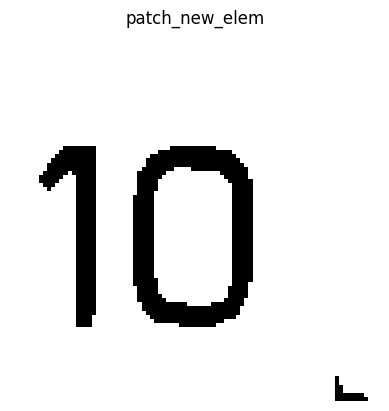

6E 10


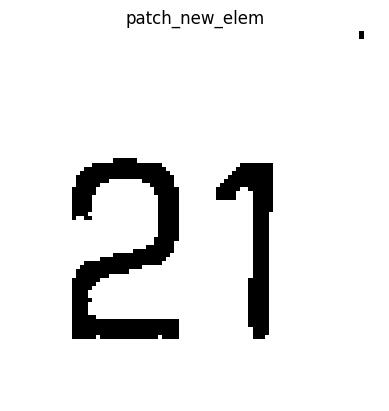

8E 21


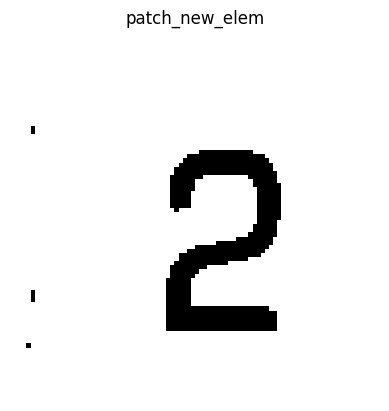

6N 2


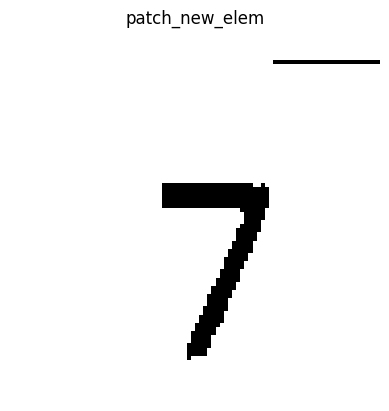

8N 7


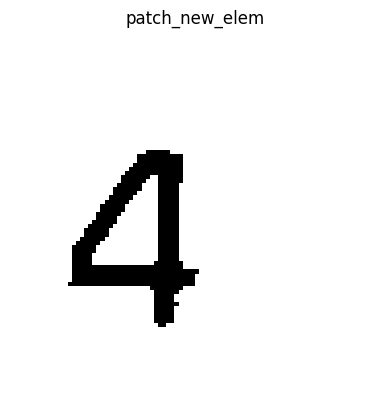

6D 4


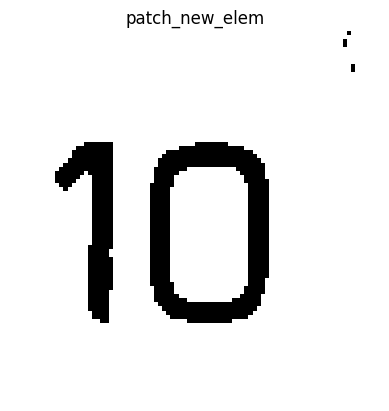

8D 10


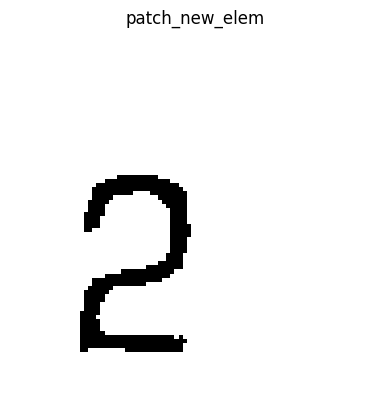

7C 2


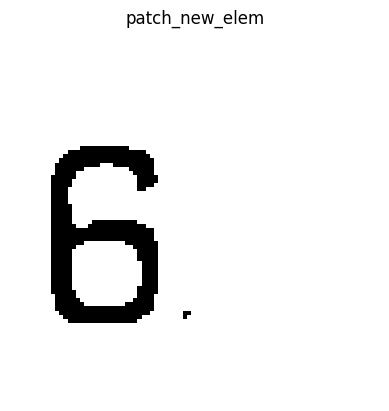

6C 6


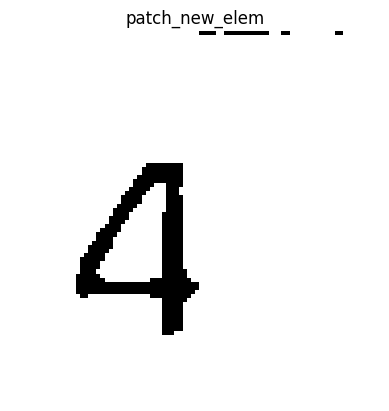

8C 4


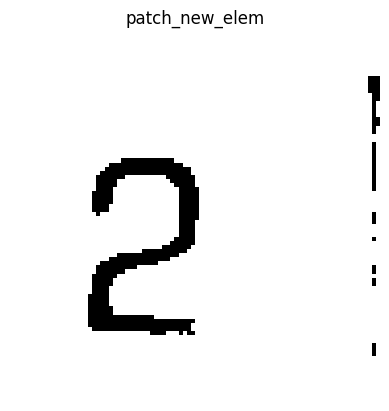

9C 2


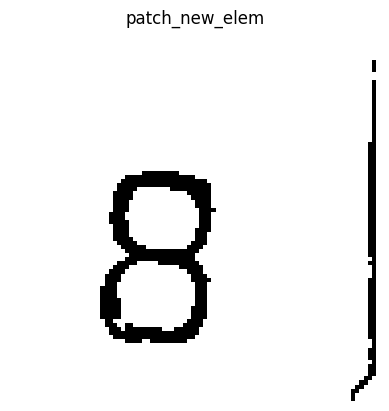

10C 8


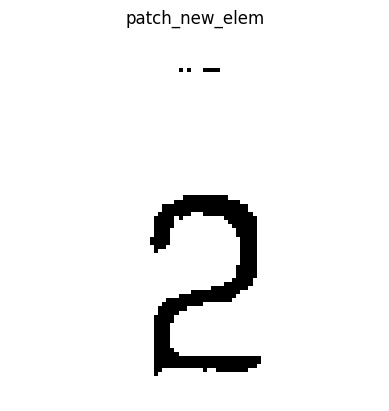

9N 2


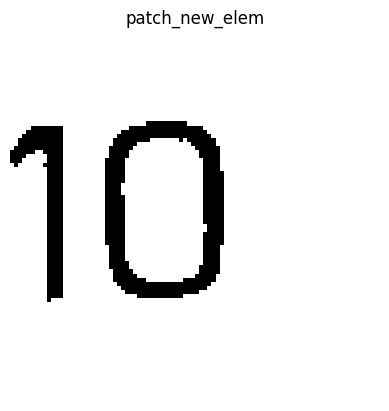

6B 10


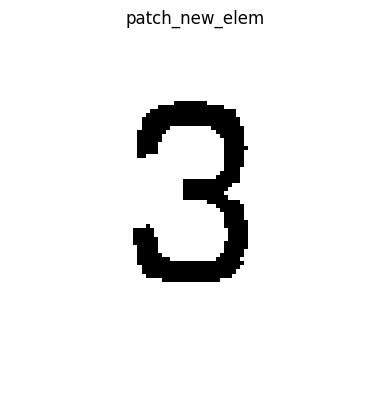

7I 3


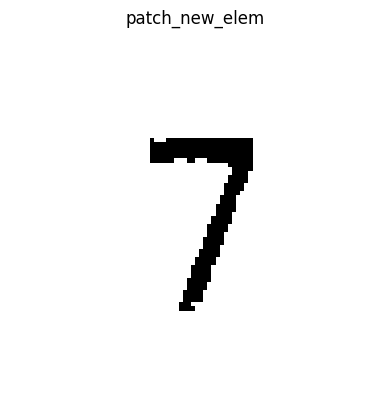

8I 7


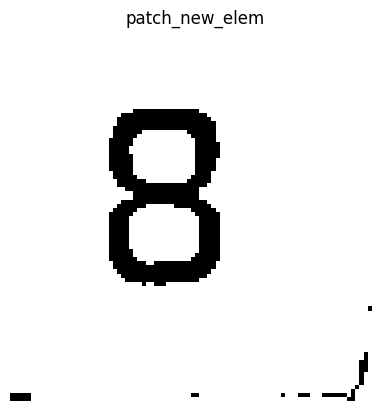

6H 8


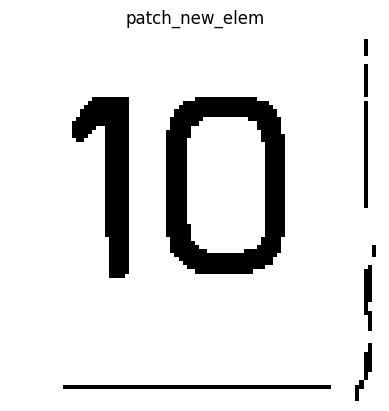

5H 10


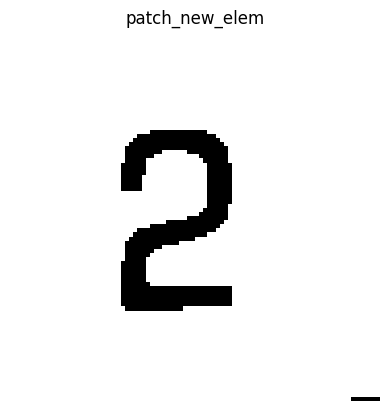

6G 2


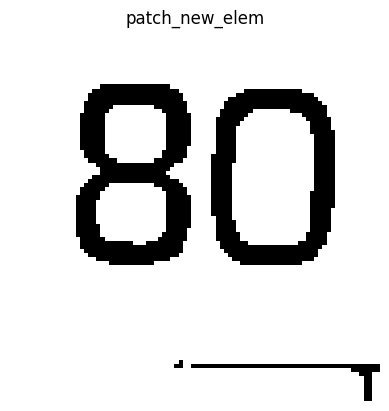

4H 80


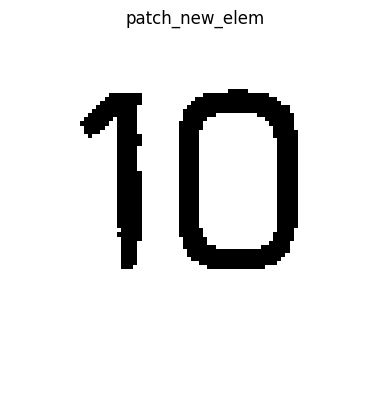

6I 10


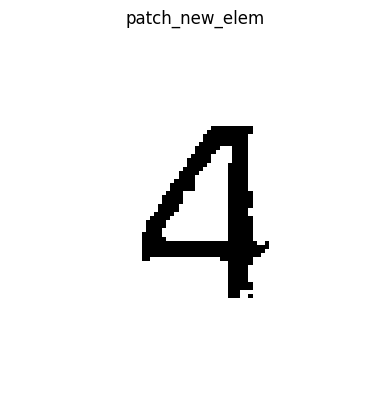

9G 4


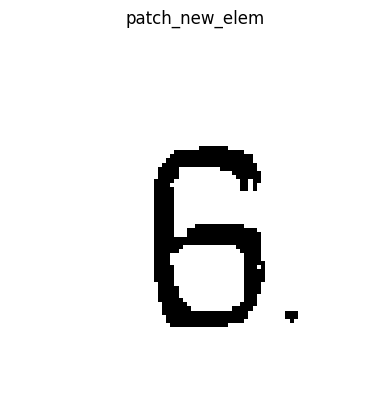

9H 6


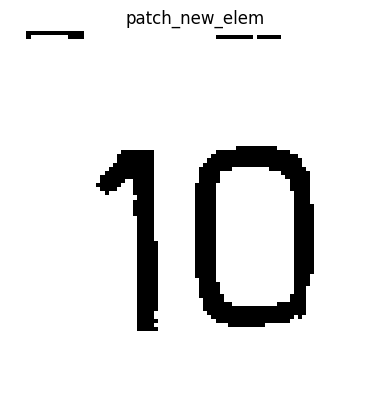

9I 10


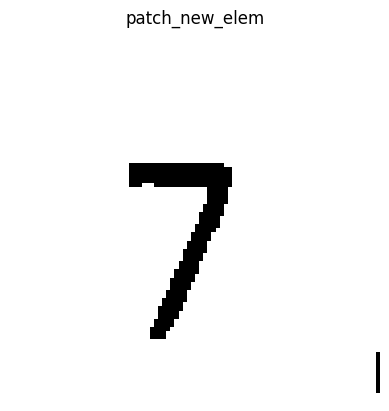

8F 7


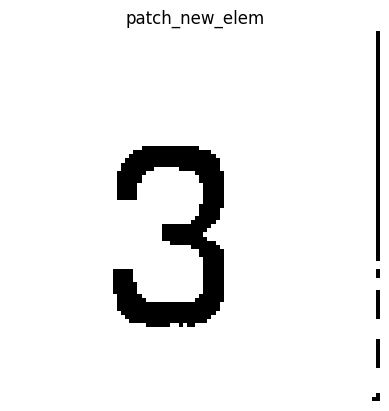

7F 3


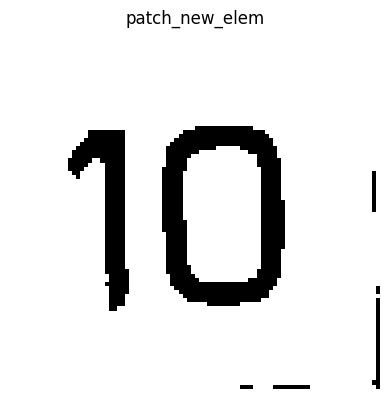

6F 10


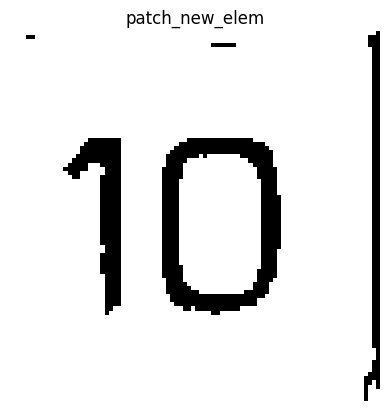

9F 10


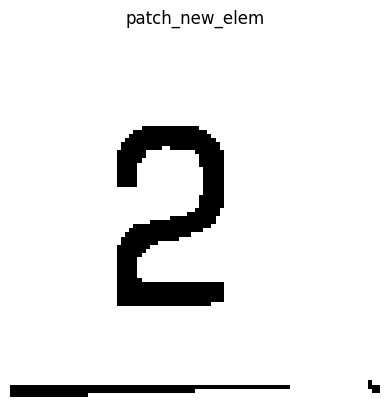

5G 2


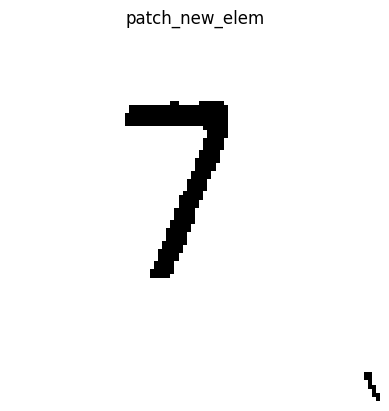

5F 7


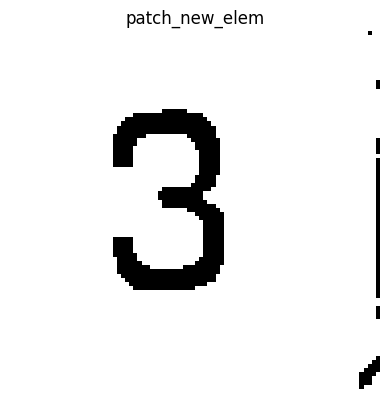

4F 3


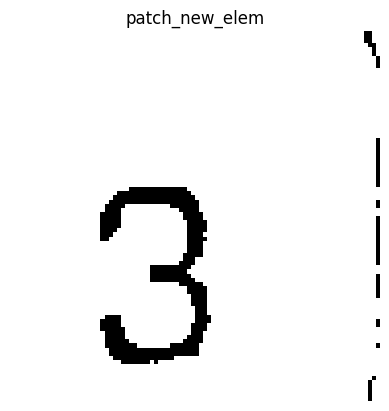

10F 3


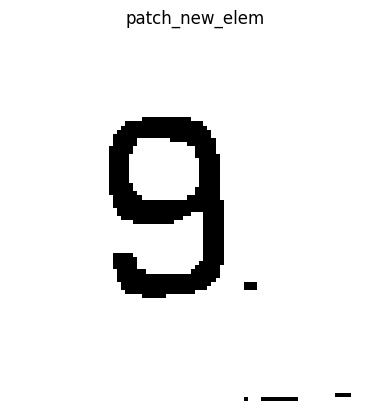

5E 9


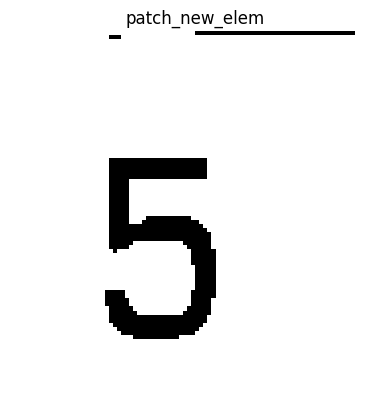

6E 5


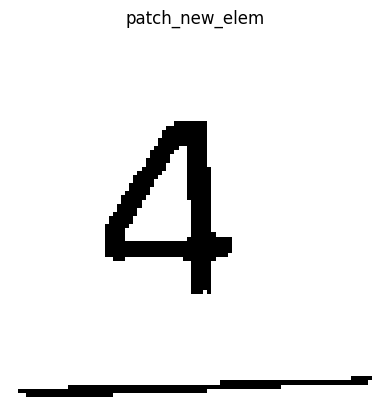

4E 4


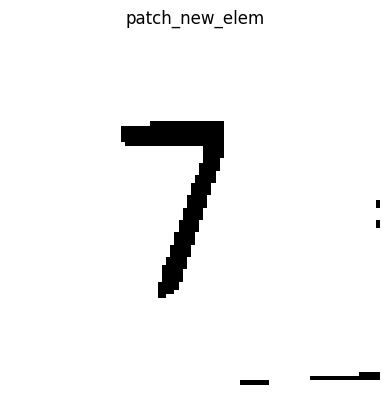

4G 7


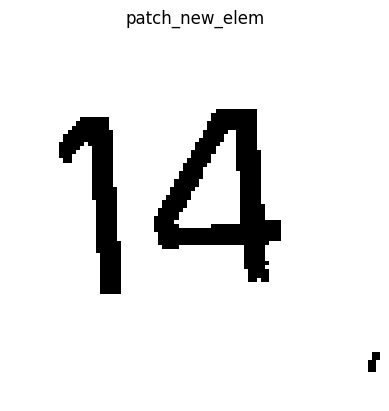

3G 14


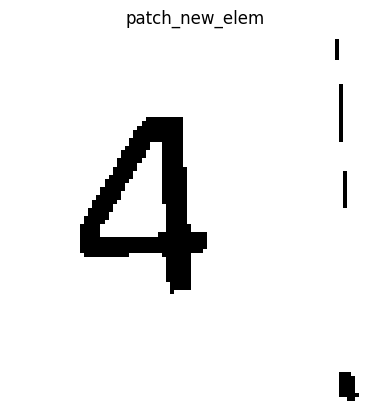

3F 4


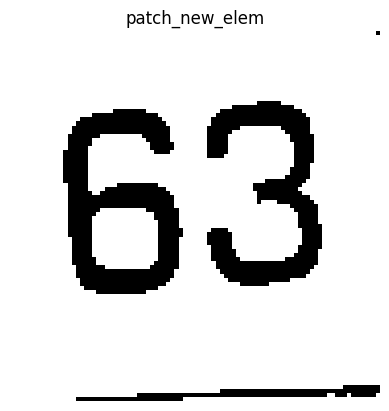

5D 63


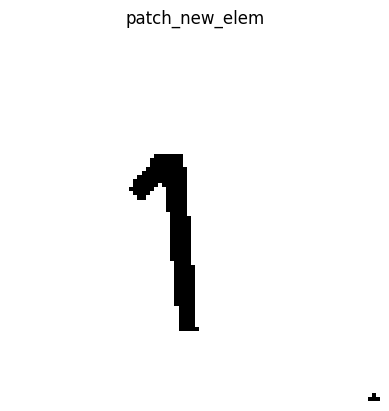

4D 1


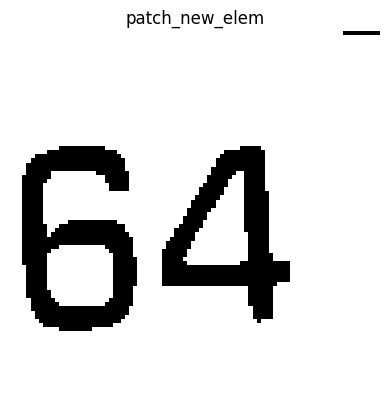

4
64
6D 64


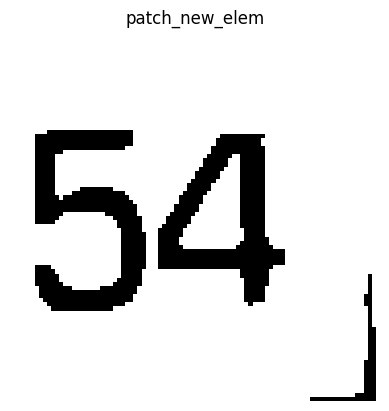

5C 54


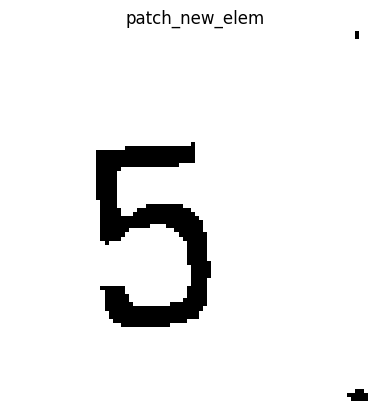

4C 5


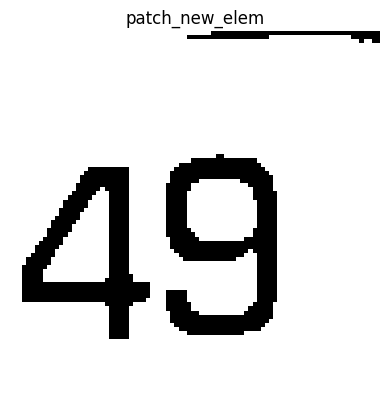

6C 49


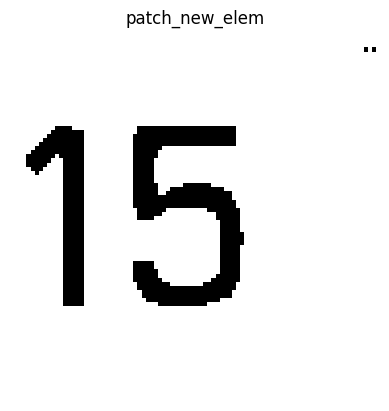

6B 15


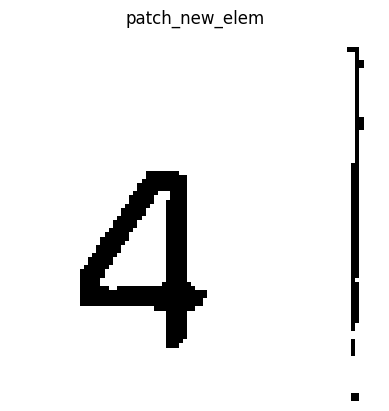

7E 4


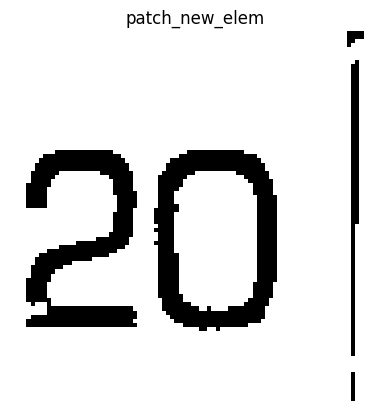

8E 20


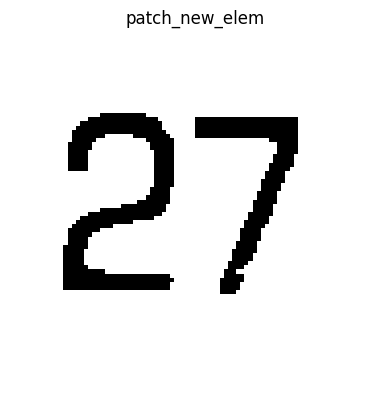

8D 27


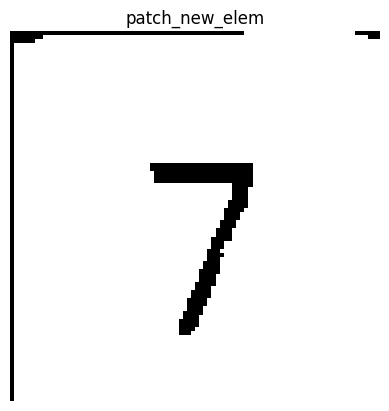

10G 7


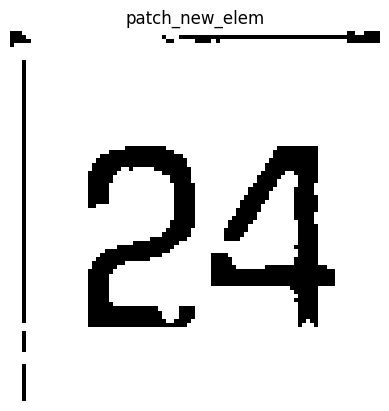

10H 24


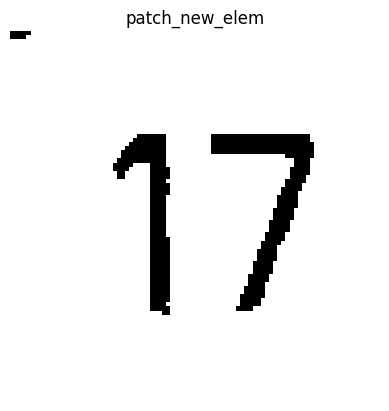

10I 17


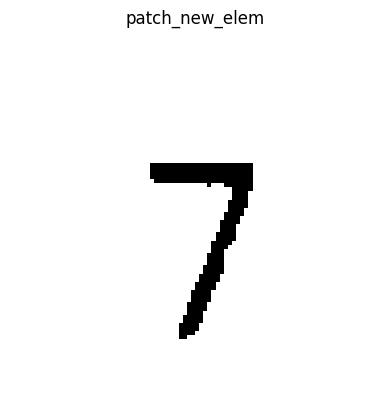

10J 7


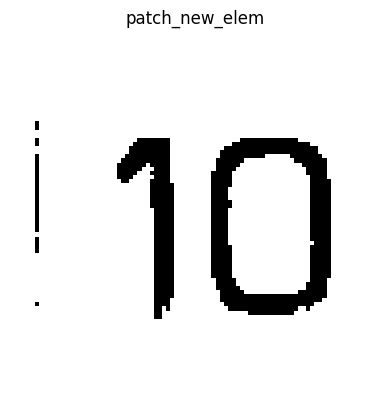

10K 10


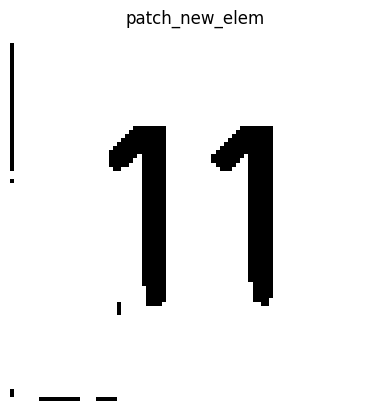

8J 11


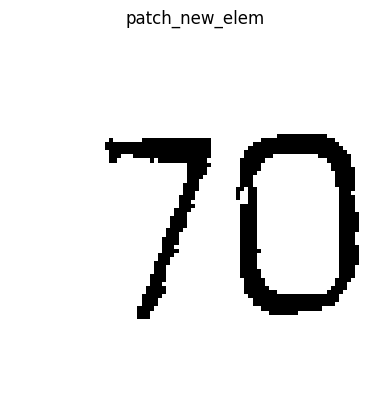

10L 70


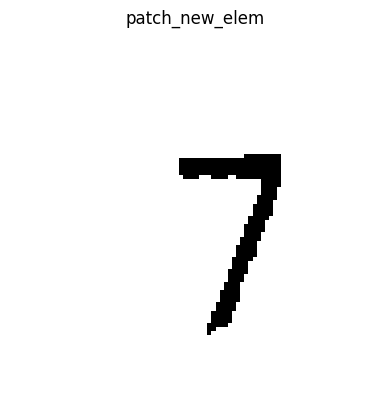

10M 7


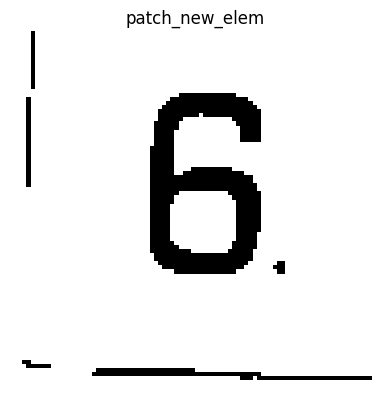

7J 6


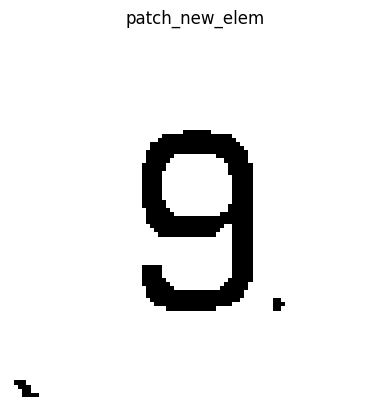

7K 9


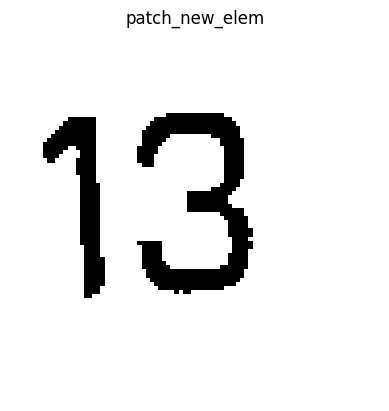

3E 13


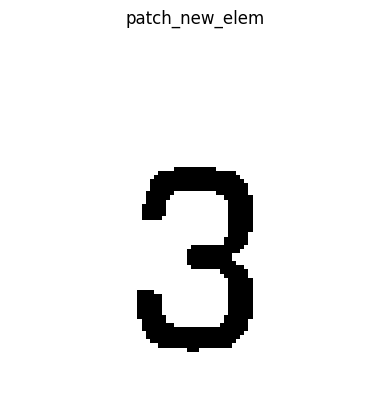

7L 3


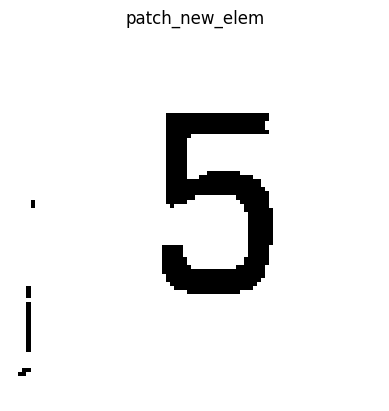

6J 5


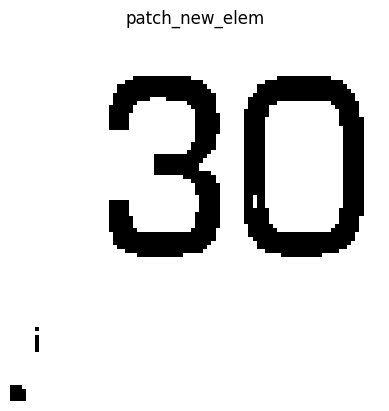

5I 30


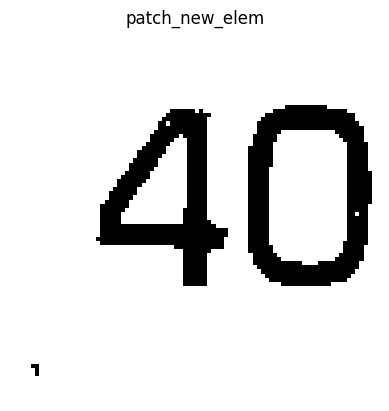

5J 40


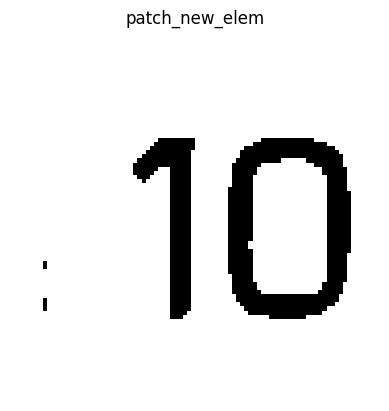

5K 10


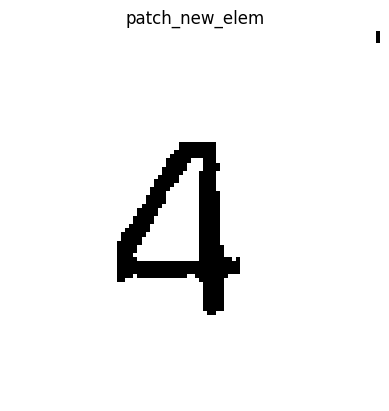

9G 4


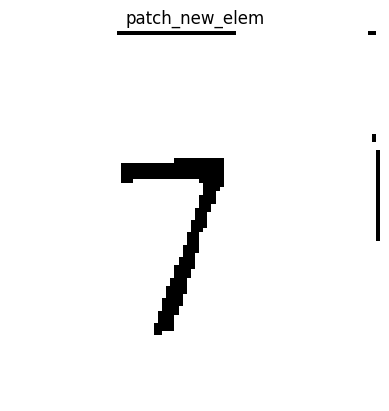

10G 7


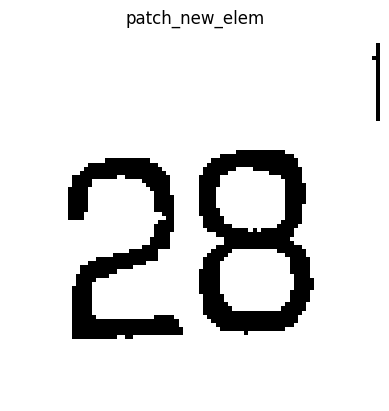

9
3
11G 3


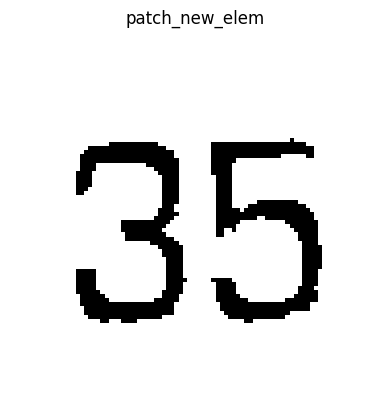

5
25
30
36
3
7
6
1
2
80
63
15
16
60
32
81
45
0
13
20
9
8
56
18
50
4
12G 4


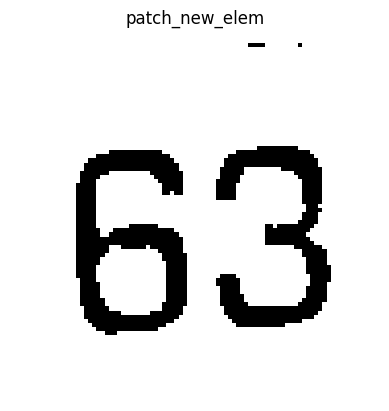

3
60
80
6
30
16
7
13G 7


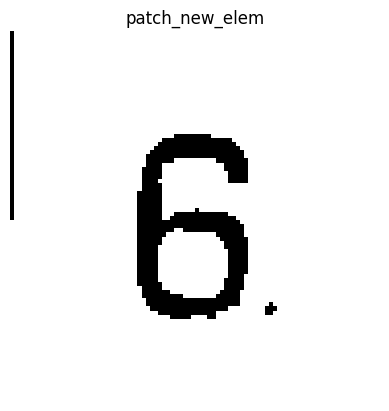

9H 6


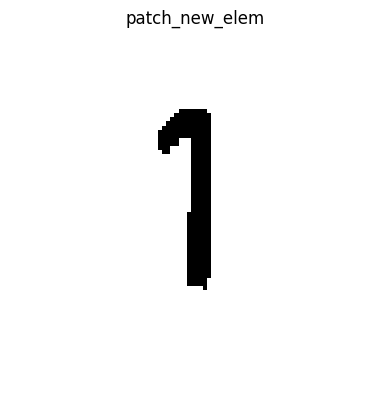

7I 1


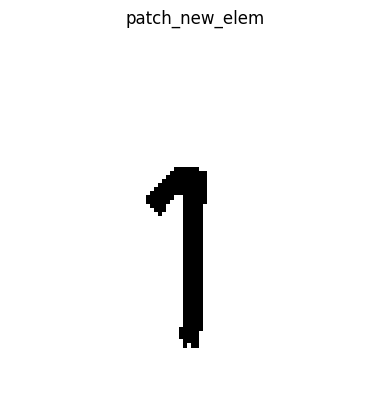

8I 1


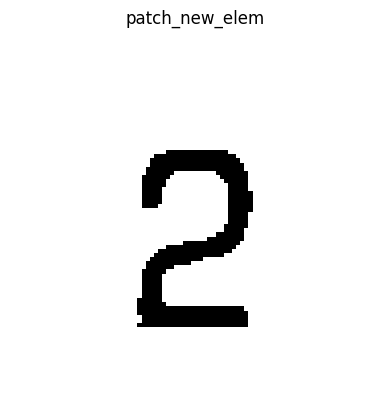

9I 2


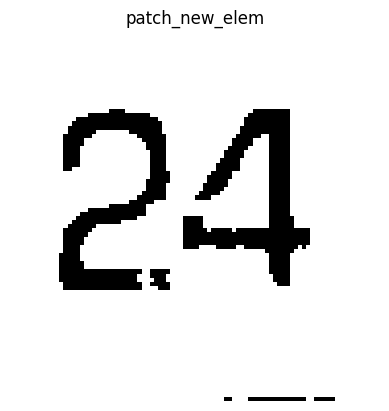

9F 24


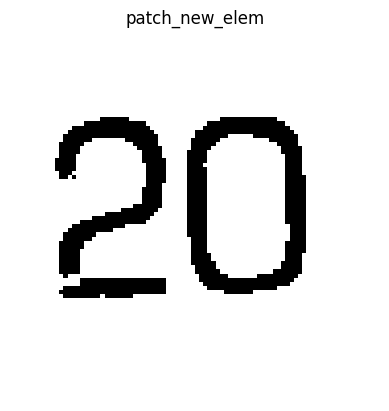

9E 20


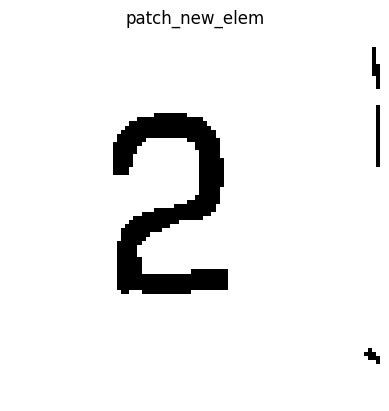

6I 2


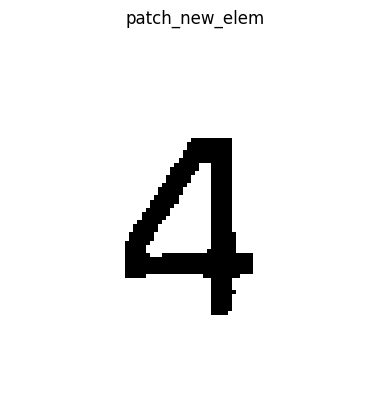

6G 4


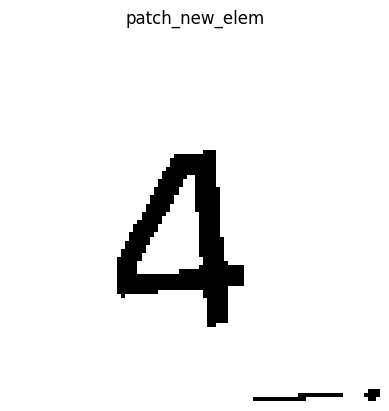

5G 4


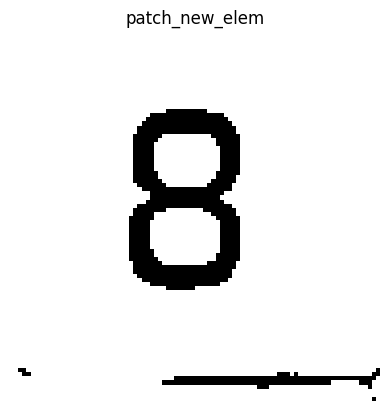

4G 8


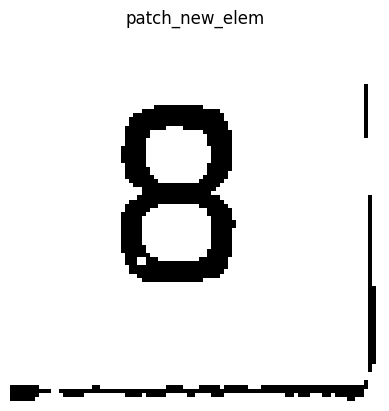

6H 8


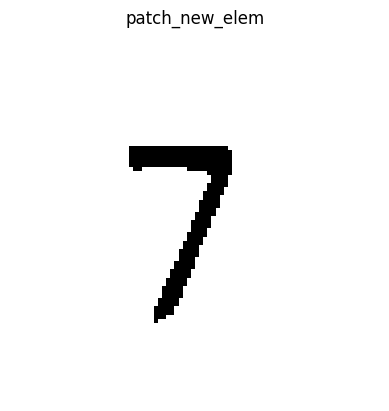

8F 7


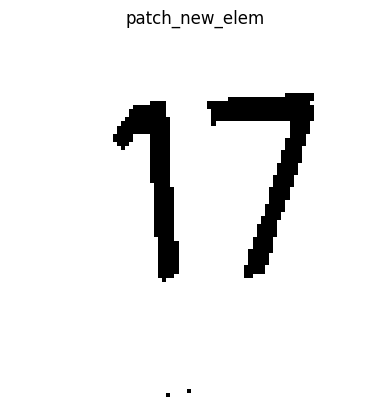

7F 17


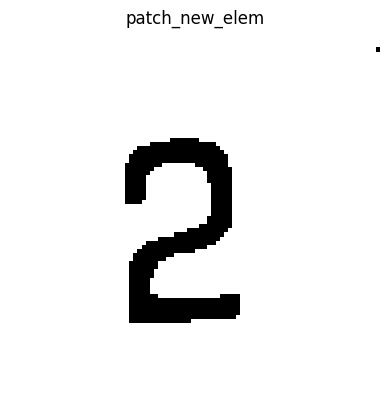

6F 2


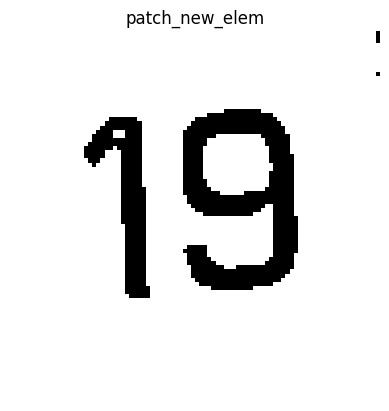

5F 19


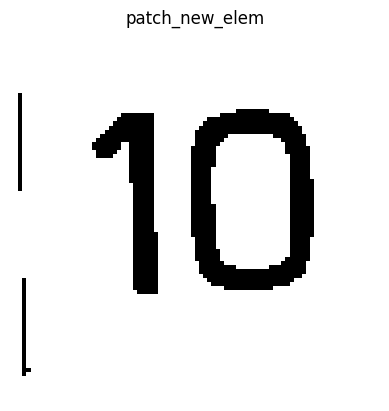

5H 10


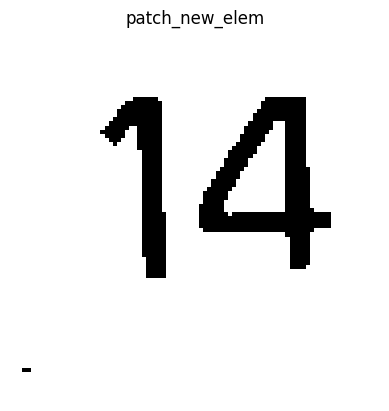

5I 14


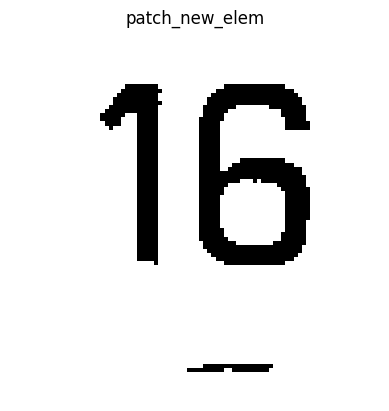

4I 16


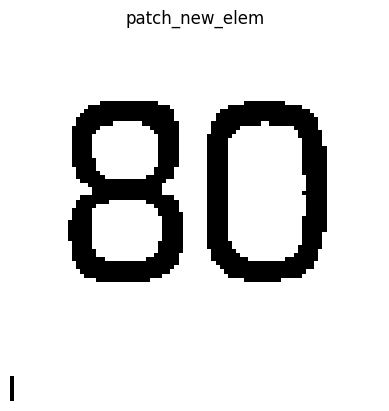

4H 80


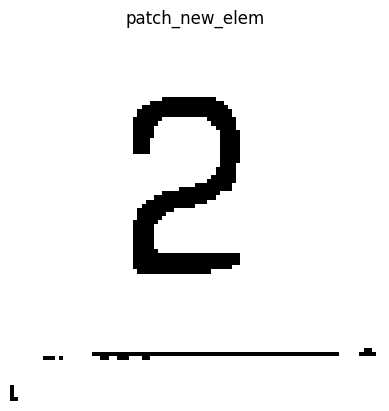

3I 2


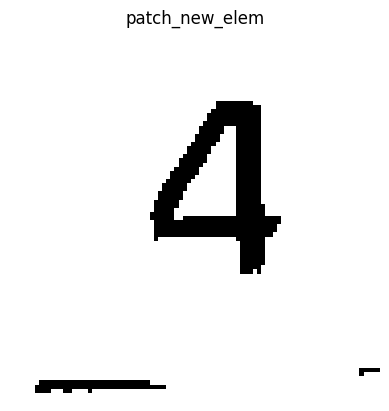

6J 4


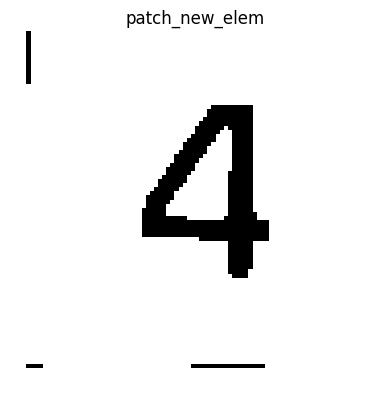

5J 4


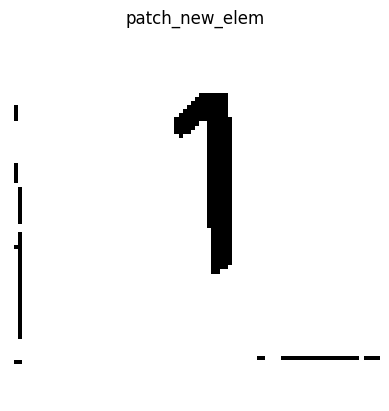

4J 1


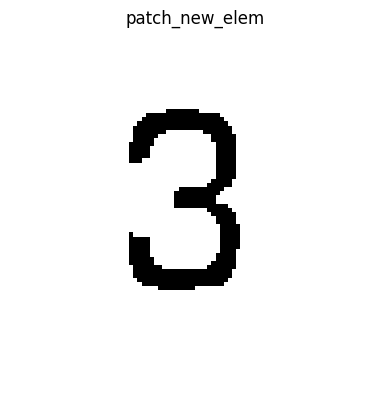

3J 3


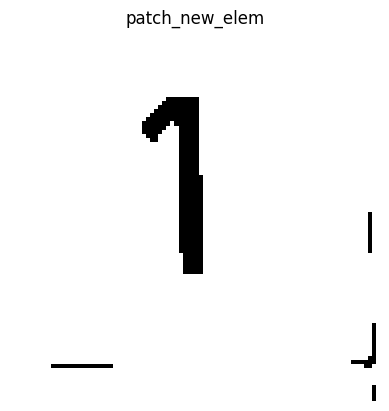

3H 1


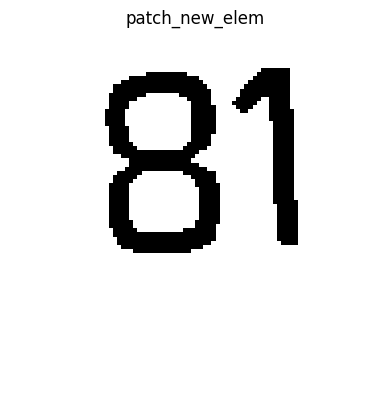

2H 81


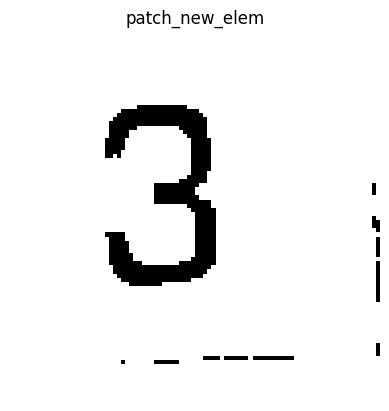

2J 3


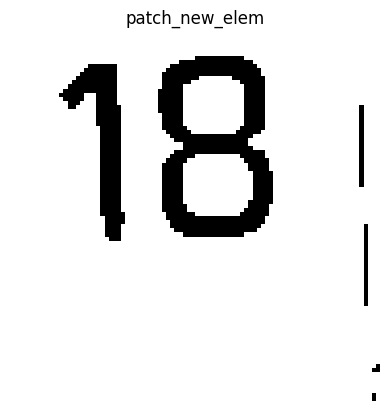

2I 18


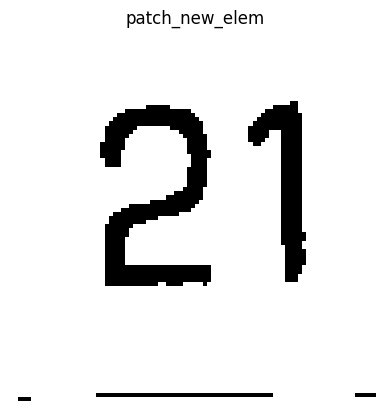

2K 21


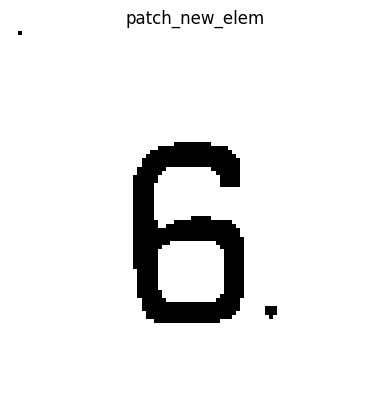

3K 6


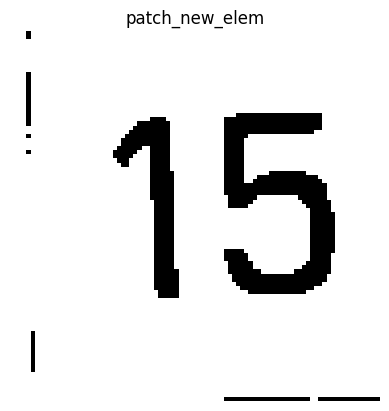

4K 15


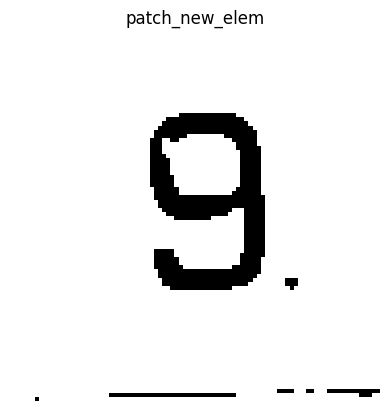

3L 9


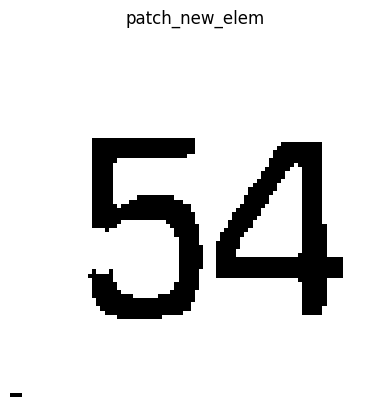

3M 54


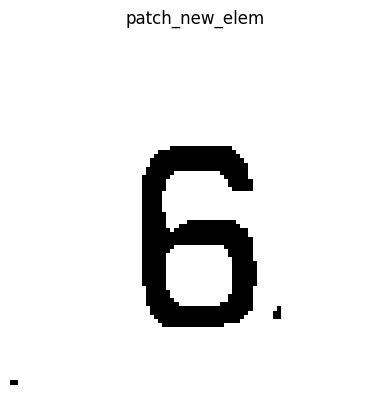

6K 6


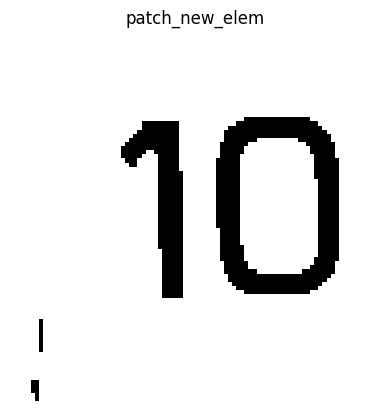

5K 10


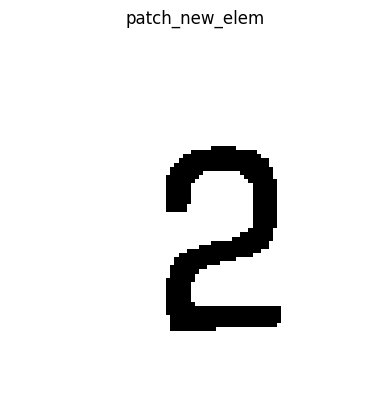

6L 2


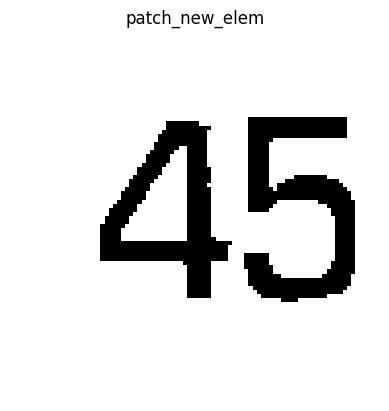

3N 45


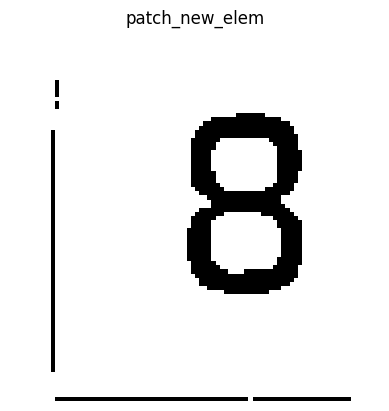

6M 8


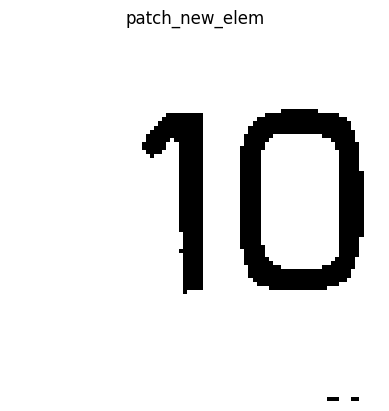

6N 10


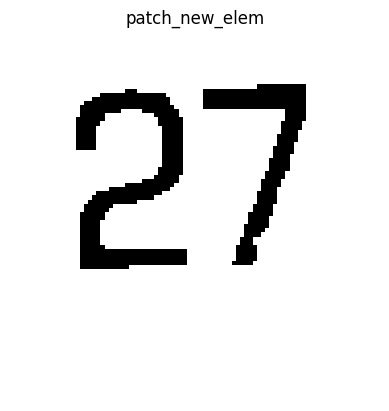

1K 27


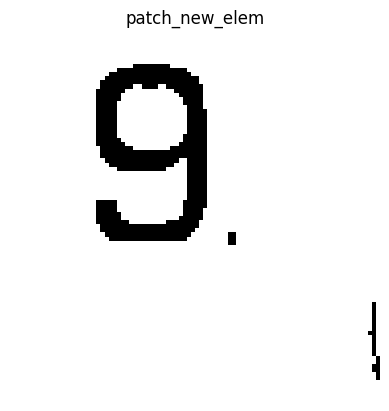

1J 9


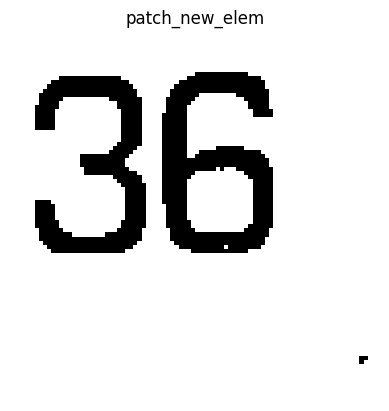

1I 36


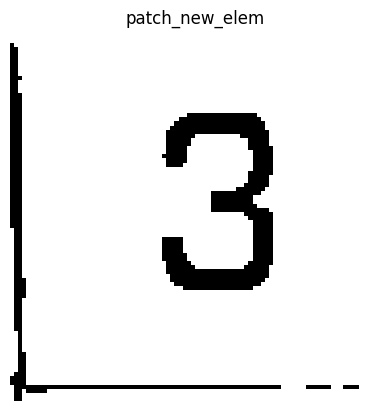

1L 3


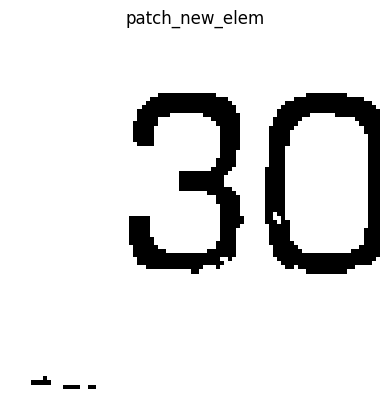

1M 30


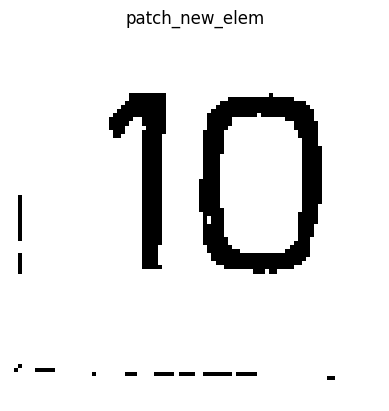

1N 10


In [17]:
files=os.listdir(path)
img_numbers = cv.imread(aux_img_path+'03.jpg')
jpg_files = [file for file in files if file.endswith('.jpg')]
jpg_files = sorted(jpg_files, key=lambda x: (int(x.split('_')[0]), int(x.split('_')[1].split('.')[0])))
empty_board = cv.imread(aux_img_path+'01.jpg')
if not os.path.exists(output_path):
    os.makedirs(output_path) 

empty_board = get_careu(empty_board)


templates, elements_to_number = get_numbers(img_numbers)


current_i = None
move = 1
moves_poz = 0
score = 0
last_move = 1

for file in jpg_files:
    i = int(file.split('_')[0])
    if i != current_i:        
        current_i = i
        prev_board = empty_board.copy()
        matrix = np.full((14, 14), -1, dtype=int)
        matrix[6][6] = 1
        matrix[6][7] = 2
        matrix[7][6] = 3
        matrix[7][7] = 4
        
        moves, player = read_moves(path+'/'+str(i)+'_turns.txt')
        move = 1
        moves_poz = 0 
        score = 0
        
        score_file_path = f'{output_path}{i}_scores.txt'
        
    if moves_poz < len(moves) and move >= moves[moves_poz]:
        moves_poz += 1
        if player:
            with open(score_file_path, 'a') as score_file:
                score_file.write(f"Player1 {last_move} {score}\n")
            # print('Player1:', score)
        else:
            with open(score_file_path, 'a') as score_file:
                score_file.write(f"Player2 {last_move} {score}\n")
            # print('Player2:', score)    
        player = not player
        score = 0
        last_move = move
    
    next_board = cv.imread(path+'/'+file)
    next_board = get_careu(next_board)
    # show_image('next_board',next_board)
    # for line in  lines_vertical : 
    #     cv.line(next_board, line[0], line[1], (0, 255, 0), 5)
    # for line in  lines_horizontal : 
    #     cv.line(next_board, line[0], line[1], (0, 0, 255), 5)
    # show_image('img',next_board)
    # save_image('next_board.jpg', next_board)
    patch_new_elem, elem_row, elem_col = get_new_element(prev_board, next_board, matrix)
    show_image('patch_new_elem',patch_new_elem)
    # save_image('patch_new_elem.jpg', patch_new_elem)
    poz = clasifica_cifra(patch_new_elem, templates)
    # print(elements_to_number[poz])
    matrix[elem_row][elem_col] = elements_to_number[poz]
    temp_templates = templates[:]
    temp_elements_to_number = elements_to_number[:]
    while not check_number(matrix, elem_row, elem_col, temp_elements_to_number[poz]):
        temp_templates = temp_templates[:poz] + temp_templates[poz + 1:]
        temp_elements_to_number = temp_elements_to_number[:poz] + temp_elements_to_number[poz + 1:]
        poz = clasifica_cifra(patch_new_elem, temp_templates)
        print(temp_elements_to_number[poz])
        matrix[elem_row][elem_col] = temp_elements_to_number[poz]
    
    move_file_path = f'{output_path}{current_i}_{move:02}.txt'
    with open(move_file_path, 'w') as move_file:
        move_file.write(f"{elem_row + 1}{chr(ord('A') + elem_col)} {matrix[elem_row][elem_col]}\n")
    print(elem_row+1, chr(ord('A') + elem_col)+ " "+str(matrix[elem_row][elem_col]), sep="")
    score += calculate_score(matrix, elem_row, elem_col)
    prev_board = next_board.copy()
    if move == 50:
        if player:
            with open(score_file_path, 'a') as score_file:
                score_file.write(f"Player1 {last_move} {score}")
            # print('Player1:', score)
        else:
            with open(score_file_path, 'a') as score_file:
                score_file.write(f"Player2 {last_move} {score}")
            # print('Player2:', score)  
        last_move = 1
    move += 1
